<a href="https://colab.research.google.com/github/R3gm/Agetic_Data_Analytics/blob/main/Agetic_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformando la educación: Cómo la incorporación de nuevas tecnologías y software libre impactó positivamente en los estudiantes


`El objetivo de este análisis es determinar si el proyecto de incorporar nuevas tecnologías y software libre en la educación tuvo un impacto significativo en los estudiantes`


- La primera prioridad que he identificado es comparar los resultados de la encuesta inicial y final de los estudiantes. Al comparar estas respuestas, espero encontrar cambios significativos en las actitudes y percepciones de los estudiantes sobre el uso de tecnología y software libre en la educación. Si los estudiantes muestran un cambio positivo en sus respuestas, esto indicaría que el proyecto tuvo un impacto en ellos.

- Otra prioridad que he identificado es buscar patrones o tendencias en los datos que muestren si los estudiantes que utilizaron más tecnología y software libre durante el proyecto tuvieron mejores resultados académicos o estuvieron más interesados en el aprendizaje. Esto permitirá determinar si la incorporación de estas tecnologías y software libre en la educación puede tener un impacto positivo en el desempeño académico y la motivación de los estudiantes.

- También quiero analizar las respuestas de los estudiantes a preguntas específicas sobre su experiencia con la tecnología y el software libre. Al hacerlo, podré determinar si hubo cambios positivos en su percepción de estos recursos. Si los estudiantes expresan una percepción más positiva de la tecnología y el software libre después del proyecto, esto indicaría que el proyecto tuvo un impacto positivo en ellos.

- Comparar los resultados de los estudiantes que participaron en el proyecto con los resultados de un grupo de control que no participó en el proyecto. Al hacer esto, podré determinar si hubo una diferencia significativa en el impacto del proyecto en los estudiantes que participaron en él. Si los estudiantes que participaron en el proyecto tienen mejores resultados académicos o una percepción más positiva de la tecnología y el software libre que el grupo de control, esto indicaría que el proyecto tuvo un impacto positivo.

- Por último, quiero identificar cualquier correlación entre el uso de tecnología y software libre en el proyecto y factores demográficos o socioeconómicos de los estudiantes, como su género, edad, nivel socioeconómico, entre otros. Al hacerlo, podré determinar si hay algún subgrupo de estudiantes que se beneficia más del proyecto y si hay alguna desigualdad en el impacto del proyecto en diferentes grupos de estudiantes.

In [38]:
!pip -q install odfpy missingno

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import missingno

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data

In [3]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/proy/Agetic/data" .

In [4]:
dir = "/content/data/"

In [5]:
def code_of_file(file_data = None, file_codes = None):
  
  register_codes = [row.strip()[:].replace("[",".").replace("]",".") for row in file_codes["Código"]]
  count_codes = []

  for column in (file_data.columns):

    cod = [row.strip()[:len(column.strip())].replace("[",".").replace("]",".") for row in file_codes["Código"]]
    if column.strip() in cod and column.strip() not in count_codes:
          index_cod = cod.index(column.strip())
          file_data.rename(columns={column:file_codes["Descripción"][index_cod]}, inplace=True)
          register_codes[index_cod] = "~"
          count_codes.append(column.strip())
    elif column.strip() in cod and column.strip() in count_codes:
          print(f'Duplicate for {cod}')
    else:
          print(f"Not found {column}")

  for code in register_codes:
    if code != "~":
      print(f"Códigos restantes {code}")
  #print(register_codes)
  #print(count_codes)
  
  return file_data

## Encuestas Iniciales

In [6]:
# archivos de fase inicial
!ls data/inicial

diccionario_variables_directores.ods  estudiantes_1f.csv
diccionario_variables_profesores.ods  profesores_inicial_1fase.csv
directores_inicial_1fase.csv	      voluntarios_1f.csv


### Encuesta Inicial a Estudiantes

In [7]:
path_data = (dir+ "inicial/estudiantes_1f.csv")
estudiantes_inicial_df = pd.read_csv(path_data) 
estudiantes_inicial_df.head(2)

a1. ¿Cuál es tu sexo?   a2. ¿Cuántos años tienes?  \
0               Femenino                         17   
1               Femenino                         15   

  a3. ¿En qué departamento se encuentra tu unidad educativa ?      \
0                                         Chuquisaca                
1                                         Chuquisaca                

  ¿En qué ciudad se encuentra tu unidad educativa?  \
0                                            Sucre   
1                                            Sucre   

        ¿Cuál es tu Unidad Educativa? b2. ¿En qué curso del colegio estas?  \
0                         LA RECOLETA                        4° Secundaria   
1  LICEO MILITAR TTE. EDMUNDO ANDRADE                        4° Secundaria   

  b2[other]. ¿En qué curso del colegio estas? [Otro]  \
0                                                NaN   
1                                                NaN   

  c1. ¿Nivel de instrucción de tu padre, madre o jefe de hogar?  \
0  Es titulado de la universidad/instituto técnic...              
1  Es titulado de la universidad/instituto técnic...              

   c2. Número de miembros en tu hogar d1. ¿Tienes computadora en tu casa?  \
0                                   5                                  No   
1                                   3                                  Sí   

   ...  \
0  ...   
1  ...   

  j8. Lograste crear  contenidos digitales (editar contenidos nuevos, integrar y elaborar contenidos previos)  \
0                                              Nunca                                                            
1                                           Rara vez                                                            

   j9.  En tu clase, lograste comunicarte en entornos digitales y pudiste compartir recursos a través de herramientas en línea.   \
0                                              Nunca                                                                               
1                                       Casi siempre                                                                               

  k1[SQ001].  ¿Qué requerimientos considera que necesita para el uso de las computadoras KUAA en su clase? [Mobiliario]  \
0                                                 No                                                                      
1                                                 No                                                                      

   k1[SQ002].  ¿Qué requerimientos considera que necesita para el uso de las computadoras KUAA en su clase? [Cableado de Red para la interconexión de las computadoras]  \
0                                                 No                                                                                                                      
1                                                 No                                                                                                                      

   k1[SQ003].  ¿Qué requerimientos considera que necesita para el uso de las computadoras KUAA en su clase? [Medidas de seguridad]  \
0                                                 No                                                                                 
1                                                 No                                                                                 

  k1[SQ004].  ¿Qué requerimientos considera que necesita para el uso de las computadoras KUAA en su clase? [Equipo de computación]  \
0                                                 No                                                                                 
1                                                 No                                                                                 

  k1[SQ005].  ¿Qué requerimientos considera que necesita para el uso de las computadoras KUAA en su clase? [Acceso a Internet]  \
0                                      


### Encuesta Inicial a Profesores

In [8]:
path_data = (dir+ "inicial/profesores_inicial_1fase.csv")
df = pd.read_csv(path_data) 
df.head(2)

a1  a2     a3     a4                          a40 b1.b11. b1.b12.  \
0  Masculino  54  Oruro  Oruro        SAN IGNACIO DE LOYOLA      No      No   
1  Masculino  63  Oruro  Oruro  BOLIVIA DE VINTO SECUNDARIA      No      No   

  b1.b13. b1.b14. b1.b15.  ...              k7              k8  l1.l11.  \
0      Sí      No      No  ...        Rara vez        Rara vez       Sí   
1      Sí      No      No  ...  Ocasionalmente  Ocasionalmente       Sí   

  l1.l12.  l1.l13. l1.l14. l1.l15. l1.other.  l2   l3  
0      No       No      No      No       NaN  No  NaN  
1      Sí       Sí      Sí      Sí       NaN  No  NaN  

[2 rows x 177 columns]

In [9]:
code_data = (dir+ "inicial/diccionario_variables_profesores.ods")
codes = pd.read_excel(code_data, engine="odf") 
codes.head(2)

Código           Descripción
0     a1    ¿Cuál es su sexo? 
1     a2  ¿Cuántos años tiene?

In [10]:
profesores_inicial_df = code_of_file(file_data = df, file_codes = codes)

In [11]:
profesores_inicial_df.head(2)

¿Cuál es su sexo?   ¿Cuántos años tiene?  \
0          Masculino                    54   
1          Masculino                    63   

  ¿En qué departamento se encuentra la unidad educativa de la cual es profesor?      \
0                                              Oruro                                  
1                                              Oruro                                  

  ¿En qué ciudad se encuentra la unidad educativa de la cual es profesor?  \
0                                              Oruro                        
1                                              Oruro                        

  ¿Cuál es la Unidad Educativa donde imparte clases?  \
0                              SAN IGNACIO DE LOYOLA   
1                        BOLIVIA DE VINTO SECUNDARIA   

  ¿Cuál es el nivel de instrucción adquirido? [Profesor Normalista]  \
0                                                 No                  
1                                                 No                  

  ¿Cuál es el nivel de instrucción adquirido? [Técnico]  \
0                                                 No      
1                                                 No      

  ¿Cuál es el nivel de instrucción adquirido? [Licenciatura]  \
0                                                 Sí           
1                                                 Sí           

  ¿Cuál es el nivel de instrucción adquirido? [Especialidad]  \
0                                                 No           
1                                                 No           

  ¿Cuál es el nivel de instrucción adquirido? [Maestría]  ...  \
0                                                 No      ...   
1                                                 No      ...   

   Integra las KUAA u otras herramientas TIC, para que el estudiante logre crear, a partir de los contenidos que estudia, vídeos, presentaciones, infografías o audios.  \
0                                           Rara vez                                                                                                                      
1                                     Ocasionalmente                                                                                                                      

   Integra las KUAA u otras herramientas TIC para que el estudiante logre comunicarse en entornos digitales y compartir recursos a través de herramientas en línea.   \
0                                           Rara vez                                                                                                                   
1                                     Ocasionalmente                                                                                                                   

    ¿Qué requerimientos considera que necesita para el uso de las computadoras KUAA en su clase? [Mobiliario]  \
0                                                 Sí                                                            
1                                                 Sí                                                            

   ¿Qué requerimientos considera que necesita para el uso de las computadoras KUAA en su clase? [Cableado de Red para la interconexión de las computadoras]  \
0                                                 No                                                                                                          
1                                                 Sí                                                                                                          

    ¿Qué requerimientos considera que necesita para el uso de las computadoras KUAA en su clase? [Medidas de seguridad]  \
0                                                 No                                                                      
1                                                 Sí                                                                      

   ¿Qué requerimien


### Encuesta Inicial a Directores

In [12]:
path_data = (dir+ "inicial/directores_inicial_1fase.csv")
df = pd.read_csv(path_data) 
df.head(2)

a1  a2          a3          a4        a40    a5   a6   a7  a8  a9  \
0  Masculino  22  Cochabamba  Cochabamba   ABAROA A  5000  100  100   1   2   
1   Femenino  55  Cochabamba  Cochabamba  TAQUIÑA B   564   96   87   3   3   

   ...   g13   g14 g15.1. g15.2. g15.3. g15.4. g15.other.   g16  g17  g18  
0  ...   NaN   NaN    NaN    NaN    NaN    NaN        NaN   NaN  NaN  NaN  
1  ...  33.0  35.0     No     Sí     Sí     No        NaN  18.0   Sí  5.0  

[2 rows x 127 columns]

In [13]:
code_data = (dir+ "inicial/diccionario_variables_directores.ods")
codes = pd.read_excel(code_data, engine="odf") 
codes.head(2)

Código           Descripción
0     a1    ¿Cuál es su sexo? 
1     a2  ¿Cuántos años tiene?

In [14]:
directores_inicial_df = code_of_file(file_data = df, file_codes = codes)

In [15]:
directores_inicial_df.head(2)

¿Cuál es su sexo?   ¿Cuántos años tiene?  \
0          Masculino                    22   
1           Femenino                    55   

  ¿En qué departamento se encuentra la unidad educativa del cual es director?      \
0                                         Cochabamba                                
1                                         Cochabamba                                

  ¿En qué ciudad se encuentra la unidad educativa del cual es director?  \
0                                         Cochabamba                      
1                                         Cochabamba                      

  ¿Cuál es la Unidad Educativa que usted dirige?  \
0                                       ABAROA A   
1                                      TAQUIÑA B   

   ¿Cuántos estudiantes tiene su unidad educativa en el nivel secundario?  \
0                                               5000                        
1                                                564                        

   ¿Cuántos estudiantes tiene su unidad educativa en el nivel 4to de secundaria?  \
0                                                100                               
1                                                 96                               

   ¿Cuántos estudiantes tiene su unidad educativa en el nivel 5to de secundaria?  \
0                                                100                               
1                                                 87                               

   ¿Cuántos paralelos tiene su unidad educativa en 4to de secundaria?  \
0                                                  1                    
1                                                  3                    

   ¿Cuántos paralelos tiene su unidad educativa en 5to de secundaria?  ...  \
0                                                  2                   ...   
1                                                  3                   ...   

  ¿Cuántos (pupitres, mesas bipersonales o mesas compartidas) en total tiene el o los ambientes habilitados en la unidad educativa?  \
0                                                NaN                                                                                  
1                                               33.0                                                                                  

  ¿Para cuántos estudiantes tiene capacidad en total el o las aulas específicas para utilizar las KUAA?  \
0                                                NaN                                                      
1                                               35.0                                                      

  ¿Con qué medidas de seguridad cuenta el o los ambientes destinados para el uso de las KUAA? [Puerta reforzada (Reja adicional o puerta de gran grosor)]  \
0                                                NaN                                                                                                        
1                                                 No                                                                                                        

  ¿Con qué medidas de seguridad cuenta el o los ambientes destinados para el uso de las KUAA? [Chapa]  \
0                                                NaN                                                    
1                                                 Sí                                                    

  ¿Con qué medidas de seguridad cuenta el o los ambientes destinados para el uso de las KUAA? [Candado]  \
0                                                NaN                                                      
1                                                 Sí                                                      

  ¿Con qué medidas de seguridad cuenta el o los ambientes destinados para el uso de las KUAA? [Cámara de seguridad]  \
0                                                NaN                      


### Encuesta Inicial a Voluntarios


In [16]:
path_data = (dir+ "inicial/voluntarios_1f.csv")
voluntarios_inicial_df = pd.read_csv(path_data) 
voluntarios_inicial_df.head(2)

a1. ¿Cuál es su sexo?   a2. ¿Cuántos años tiene?  \
0              Masculino                        24   
1               Femenino                        24   

  a3. ¿En qué departamento se encuentra la unidad educativa del cual es voluntario?      \
0                                              Oruro                                      
1                                              Oruro                                      

   ¿En qué ciudad se encuentra la unidad educativa en el cual será voluntario?  \
0                                       Machacamarca                             
1                                              Oruro                             

   ¿Cuál es la Unidad Educativa donde será voluntario?  \
0                            PEDRO DOMINGO MURILLO 2     
1                     JUAN MISAEL SARACHO SECUNDARIA     

                  b1. Nivel de Instrucción que posee  \
0  Estudiante de Informática, Ing. de Sistemas, E...   
1  Estudiante de Informática, Ing. de Sistemas, E...   

  b2. ¿Cuantos años de experiencia tiene en enseñanza?  \
0                                            Ninguno     
1                                      1 año o menos     

  c1. ¿Tienen computadora en su casa?  \
0                                  Sí   
1                                  Sí   

  c2. ¿Es una computadora de escritorio o una laptop?  \
0                                             Laptop    
1                                         Escritorio    

   c3. ¿Cuántas computadoras tiene?  ...  \
0                               3.0  ...   
1                               1.0  ...   

  f3[f36]. De los programas que se menciona a continuación, ¿Cuáles utilizas? [Audacity (Editor de audio)]  \
0                                                NaN                                                         
1                                                 No                                                         

   f3[f37]. De los programas que se menciona a continuación, ¿Cuáles utilizas? [Openshot (Editor de video )]  \
0                                                NaN                                                           
1                                                 No                                                           

   f3[f38]. De los programas que se menciona a continuación, ¿Cuáles utilizas? [Wordpress (Sistema para crear siios web)]  \
0                                                NaN                                                                        
1                                                 Sí                                                                        

  f3[f39]. De los programas que se menciona a continuación, ¿Cuáles utilizas? [Sozi (Presentaciones)]  \
0                                                NaN                                                    
1                                                 No                                                    

  f3[f310]. De los programas que se menciona a continuación, ¿Cuáles utilizas? [Inkscape (Edición de imágenes vectoriales)]  \
0                                                NaN                                                                          
1                                                 No                                                                          

  f3[f311]. De los programas que se menciona a continuación, ¿Cuáles utilizas? [Ninguno]  \
0                                                NaN                                       
1                                                 No                                       

  f3[other]. De los programas que se menciona a continuación, ¿Cuáles utilizas? [Otro]  \
0                                                NaN                                     
1                                                NaN                                     

  g1. ¿Sabe lo que son las licencias libres?  \
0                               

## Encuestas Finales

In [17]:
# archivos de fase final
!ls data/final

diccionario-de-variables-final-directores.ods	directores_fin.csv
diccionario-de-variables-final-estudiantes.ods	estudiantes_fin.csv
diccionario-de-variables-final-profesores.ods	profesores_fin.csv
diccionario-de-variables-final-voluntarios.ods	voluntarios_fin.csv



### Encuesta Final a Estudiantes

In [18]:
path_data = (dir+ "final/estudiantes_fin.csv")
df = pd.read_csv(path_data) 
df.head(2)

a0         a1  a2          a3          a4                 a40  \
0  No  Masculino  16      La Paz     El Alto  1RO. DE MAYO TARDE   
1  No   Femenino  15  Cochabamba  Cochabamba         SAN ANTONIO   

              b2 b2.other.                               c1  c2  ...   k3  \
0  2° Secundaria       NaN      Tiene estudios de postgrado   8  ...  NaN   
1  1° Secundaria       NaN  Cursó algún nivel en la escuela   6  ...  NaN   

        l1                                          l2           l3  \
0    buena                                         NaN  mas o menos   
1  regular  Me parece algo regular ya que enseñan poco  mas o menos   

                                                  l4  l5  \
0                                                NaN  Sí   
1  Pues es de allí donde puedo encontrar una info...  Sí   

                                                  l6       l7  \
0                                                NaN    buena   
1  Porque allí es donde puedo así ampliar mis con...  regular   

                                                 i71  \
0                                                NaN   
1  Algunas veces no las entiendo,pero preguntando...   

                                                  l8  
0                                No lo conozco bien   
1  Q se vaya mejorando él paso a paso para entend...  

[2 rows x 149 columns]

In [20]:
code_data = (dir+ "final/diccionario-de-variables-final-estudiantes.ods")
codes = pd.read_excel(code_data, engine="odf") 
codes.head(2)

Código                                    Descripción
0     a0  ¿Fuiste parte del proyecto Inclusión Digital?
1     a1                             ¿Cuál es tu sexo?

In [21]:
estudiantes_final_df = code_of_file(file_data = df, file_codes = codes)

In [22]:
estudiantes_final_df.head(2)

¿Fuiste parte del proyecto Inclusión Digital? ¿Cuál es tu sexo?   \
0                                            No          Masculino   
1                                            No           Femenino   

   ¿Cuántos años tienes?  \
0                     16   
1                     15   

  ¿En qué departamento se encuentra tu unidad educativa ?      \
0                                             La Paz            
1                                         Cochabamba            

  ¿En qué ciudad se encuentra tu unidad educativa?  \
0                                          El Alto   
1                                       Cochabamba   

  ¿Cuál es tu Unidad Educativa? ¿En qué curso del colegio estas?  \
0            1RO. DE MAYO TARDE                    2° Secundaria   
1                   SAN ANTONIO                    1° Secundaria   

  ¿En qué curso del colegio estas? [Otro]  \
0                                     NaN   
1                                     NaN   

  ¿Nivel de instrucción de tu padre, madre o jefe de hogar?  \
0                        Tiene estudios de postgrado          
1                    Cursó algún nivel en la escuela          

   Número de miembros en tu hogar  ...  \
0                               8  ...   
1                               6  ...   

   Describa brevemente acerca del "Proyecto Inclusión Digital"  \
0                                                NaN             
1                                                NaN             

  ¿Como calificas la capacitación brindada por el proyecto Inclusión Digital?  \
0                                              buena                            
1                                            regular                            

                                    ¿Por qué?  \
0                                         NaN   
1  Me parece algo regular ya que enseñan poco   

  Posterior a la capacitación, ¿crees que el uso de tecnologías puede ser útil para el Proceso de Educación y Aprendizaje?  \
0                                        mas o menos                                                                         
1                                        mas o menos                                                                         

                                           ¿Por qué?  \
0                                                NaN   
1  Pues es de allí donde puedo encontrar una info...   

   ¿Crees que el uso de tecnologías y herramientas de software libre mejoró tu aprendizaje?  \
0                                                 Sí                                          
1                                                 Sí                                          

                                           ¿Por qué?  \
0                                                NaN   
1  Porque allí es donde puedo así ampliar mis con...   

  ¿Cómo calificas la labor de los voluntarios en el aula?  \
0                                              buena        
1                                            regular        

                                           ¿Por qué?  \
0                                                NaN   
1  Algunas veces no las entiendo,pero preguntando...   

  Anote alguna recomendación u observación para el proyecto Inclusión Digital  
0                                No lo conozco bien                            
1  Q se vaya mejorando él paso a paso para entend...                           

[2 rows x 149 columns]


### Encuesta Final a Profesores

In [23]:
path_data = (dir+ "final/profesores_fin.csv")
df = pd.read_csv(path_data) 
df.head(2)

a0         a1  a2          a3                       a4              a40  \
0  Sí  Masculino  32  Santa Cruz  Santa Cruz de la Sierra  NACIONAL COTOCA   
1  Sí  Masculino  38      La Paz                  El Alto      PRIMAVERA B   

  b1.b11. b1.b12. b1.b13. b1.b14.  ...  \
0      Sí      No      Sí      No  ...   
1      Sí      No      Sí      No  ...   

                                                  m2     m3  \
0                         Me falto mas por aprender.  mucho   
1  respondió ha algunas inquietudes que tuve como...  mucho   

                                                  m4  m5  \
0  Es muy importante para un mejor desarrollo en ...  Sí   
1  al tener conocimiento suficiente de las herram...  Sí   

                                                  m6         m7  \
0  Hubo motivación a la hora de aprender un nuevo...  excelente   
1  aun estamos en proceso de manejar estos softwa...      buena   

                                                 m71  m8  \
0  Tuvieron la paciencia necesaria con todas nues...  Sí   
1                    compartieron sus conocimientos.  Sí   

                                                  m9  \
0                          Seria bueno aprender mas.   
1  cuanto mas te capacites con las nuevas tecnolo...   

                                                 m10  
0  Me gustaria que al proximo año siga existiendo...  
1  espero que esta actividad piloto no se quede s...  

[2 rows x 189 columns]

In [24]:
code_data = (dir+ "final/diccionario-de-variables-final-profesores.ods")
codes = pd.read_excel(code_data, engine="odf") 
codes.head(2)

Código                                 Descripción
0     a0  ¿Fue parte del proyecto Inclusión Digital?
1     a1                          ¿Cuál es su sexo?

In [25]:
profesores_final_df = code_of_file(file_data = df, file_codes = codes)

In [26]:
profesores_final_df.head(2)

¿Fue parte del proyecto Inclusión Digital? ¿Cuál es su sexo?   \
0                                         Sí          Masculino   
1                                         Sí          Masculino   

   ¿Cuántos años tiene?  \
0                    32   
1                    38   

  ¿En qué departamento se encuentra la unidad educativa de la cual es profesor?      \
0                                         Santa Cruz                                  
1                                             La Paz                                  

  ¿En qué ciudad se encuentra la unidad educativa de la cual es profesor?  \
0                            Santa Cruz de la Sierra                        
1                                            El Alto                        

  ¿Cuál es la Unidad Educativa donde imparte clases?  \
0                                    NACIONAL COTOCA   
1                                        PRIMAVERA B   

  ¿Cuál es el nivel de instrucción adquirido? [Profesor Normalista]  \
0                                                 Sí                  
1                                                 Sí                  

  ¿Cuál es el nivel de instrucción adquirido? [Técnico]  \
0                                                 No      
1                                                 No      

  ¿Cuál es el nivel de instrucción adquirido? [Licenciatura]  \
0                                                 Sí           
1                                                 Sí           

  ¿Cuál es el nivel de instrucción adquirido? [Especialidad]  ...  \
0                                                 No          ...   
1                                                 No          ...   

                                           ¿Por qué?  \
0                         Me falto mas por aprender.   
1  respondió ha algunas inquietudes que tuve como...   

  ¿Cree que el uso de tecnologías puede ser útil para el Proceso de Educación y Aprendizaje?   \
0                                              mucho                                            
1                                              mucho                                            

                                           ¿Por qué?  \
0  Es muy importante para un mejor desarrollo en ...   
1  al tener conocimiento suficiente de las herram...   

   ¿Cree que el uso de tecnologías y herramientas de software libre mejoró el aprendizaje de los estudiantes?  \
0                                                 Sí                                                            
1                                                 Sí                                                            

                                           ¿Por qué?  \
0  Hubo motivación a la hora de aprender un nuevo...   
1  aun estamos en proceso de manejar estos softwa...   

   ¿Cómo califica la labor de los voluntarios en el aula?  \
0                                          excelente        
1                                              buena        

                                           ¿Por qué?  \
0  Tuvieron la paciencia necesaria con todas nues...   
1                    compartieron sus conocimientos.   

  Con fases de capacitación mas intensivas ¿usted cree que puede adecuar sus futuras clases a este nuevo modelo de enseñanza aprendizaje que incorpora las TIC?  \
0                                                 Sí                                                                                                              
1                                                 Sí                                                                                                              

                                           ¿Por qué?  \
0                          Seria bueno aprender mas.   
1  cuanto mas te capacites con las nuevas tecnolo...   

  Tiene alguna recomendación u observación para el proyecto Inclusión Digital.  
0  Me gustaria que al proximo 


### Encuesta Final a Directores

In [27]:
path_data = (dir+ "final/directores_fin.csv")
df = pd.read_csv(path_data) 
df.head(2)

a0         a1  a2      a3       a4                         a40   a5   a7  \
0  Sí  Masculino  49  La Paz  El Alto         12 DE OCTUBRE TARDE  744  127   
1  Sí  Masculino  46  La Paz   La Paz  ABRAHAM REYES FE Y ALEGRIA  603  100   

   a8   a6  ...                                                 m2     m3  \
0   5  134  ...                  Es nuevo y voluntarios activos...  mucho   
1   3   98  ...  los facilitadores tienen la predisposición de ...  mucho   

                                                  m4  m5  \
0       Actualiza, motiva, promueve los aprendizajes  Sí   
1  Porque en esta era la tecnología es una necesi...  Sí   

                                                  m6         m7  \
0                                Aprendizajes nuevos  excelente   
1  Los estudiantes ven nuevos programas y entiend...      buena   

                                                 m71  m8  \
0                     Activos, motivadores y conocen  Sí   
1  Tienen la predisposición de colaborar en cualq...  Sí   

                                                  m9  \
0                   Conocer mas el uso y dinamisidad   
1  De esa manera podemos empoderar a los docentes...   

                                                 m10  
0                 Involucrar a gobierno municipal...  
1  Este programa es necesario debido a que no exi...  

[2 rows x 139 columns]

In [28]:
code_data = (dir+ "final/diccionario-de-variables-final-directores.ods")
codes = pd.read_excel(code_data, engine="odf") 
codes.head(2)

Código                                 Descripción
0     a0  ¿Fue parte del proyecto Inclusión Digital?
1     a1                          ¿Cuál es su sexo?

In [29]:
directores_final_df = code_of_file(file_data = df, file_codes = codes)

In [30]:
directores_final_df.head(2)

¿Fue parte del proyecto Inclusión Digital? ¿Cuál es su sexo?   \
0                                         Sí          Masculino   
1                                         Sí          Masculino   

   ¿Cuántos años tiene?  \
0                    49   
1                    46   

  ¿En qué departamento se encuentra la unidad educativa del cual es director?      \
0                                             La Paz                                
1                                             La Paz                                

  ¿En qué ciudad se encuentra la unidad educativa del cual es director?  \
0                                            El Alto                      
1                                             La Paz                      

  ¿Cuál es la Unidad Educativa que usted dirige?  \
0                            12 DE OCTUBRE TARDE   
1                     ABRAHAM REYES FE Y ALEGRIA   

   ¿Cuántos estudiantes tiene su unidad educativa en el nivel secundario?  \
0                                                744                        
1                                                603                        

   ¿Cuántos estudiantes tiene su unidad educativa en el nivel 5to de secundaria?  \
0                                                127                               
1                                                100                               

   ¿Cuántos paralelos tiene su unidad educativa en 4to de secundaria?  \
0                                                  5                    
1                                                  3                    

   ¿Cuántos estudiantes tiene su unidad educativa en el nivel 4to de secundaria?  \
0                                                134                               
1                                                 98                               

   ...                                          ¿Por qué?  \
0  ...                  Es nuevo y voluntarios activos...   
1  ...  los facilitadores tienen la predisposición de ...   

  ¿Cree que el uso de tecnologías puede ser útil para el Proceso de Educación y Aprendizaje?   \
0                                              mucho                                            
1                                              mucho                                            

                                           ¿Por qué?  \
0       Actualiza, motiva, promueve los aprendizajes   
1  Porque en esta era la tecnología es una necesi...   

  ¿Cree que el uso de tecnologías y herramientas de software libre mejoró el aprendizaje de los estudiantes?  \
0                                                 Sí                                                           
1                                                 Sí                                                           

                                           ¿Por qué?  \
0                                Aprendizajes nuevos   
1  Los estudiantes ven nuevos programas y entiend...   

  ¿Cómo califica la labor de los voluntarios en el aula?  \
0                                          excelente       
1                                              buena       

                                           ¿Por qué?  \
0                     Activos, motivadores y conocen   
1  Tienen la predisposición de colaborar en cualq...   

  Con fases de capacitación mas intensivas ¿usted cree que puede adecuar sus futuras clases a este nuevo modelo de enseñanza aprendizaje que incorpora las TIC?  \
0                                                 Sí                                                                                                              
1                                                 Sí                                                                                                              

                                           ¿Por qué?  \
0                   Conocer mas el uso y dinamisidad   
1  De esa manera p


### Encuesta Final a Voluntarios


In [31]:
path_data = (dir+ "final/voluntarios_fin.csv")
df = pd.read_csv(path_data) 
df.head(2)

a1  a2          a3                       a4  \
0  Masculino  31  Santa Cruz  Santa Cruz de la Sierra   
1  Masculino  27       Oruro             Machacamarca   

                       a40                                                 b1  \
0  RAMON DARIO GUTIERREZ A  Estudiante de Informática, Ing. de Sistemas, E...   
1  PEDRO DOMINGO MURILLO 2  Estudiante de Informática, Ing. de Sistemas, E...   

              b2  c1          c2   c3  ...  \
0  1 año o menos  Sí  Escritorio  2.0  ...   
1  1 año o menos  Sí  Escritorio  3.0  ...   

                                                  m2     m3  \
0  Porque a pesar de los problemas sociales, los ...  mucho   
1  Las  capacitaciones se realizaron de manera ac...  mucho   

                                                  m4  m5  \
0  Es precisamente por el hecho de llegar mas apt...  Sí   
1  El aprender y enseñar se facilita, permitiendo...  Sí   

                                                  m6         m7  \
0  Porque son herramientas que ellos pueden con s...      buena   
1  La mejor manera de aprender es practicando y l...  excelente   

                                                 m71  m8  \
0  Hubo maestros muy interesados en capacitarse y...  Sí   
1  El entusiasmo fue contagioso, la adaptación de...  Sí   

                                                  m9  \
0  Para una próxima implementación del proyecto y...   
1  La practica es la mejor manera de aprender y e...   

                                                 m10  
0  Simplemente empezar el proyecto mas antes, es ...  
1  -Recomendación: Se debería evaluar la distanci...  

[2 rows x 109 columns]

In [32]:
code_data = (dir+ "final/diccionario-de-variables-final-voluntarios.ods")
codes = pd.read_excel(code_data, engine="odf") 
codes.head(2)

Código           Descripción
0     a1    ¿Cuál es su sexo? 
1     a2  ¿Cuántos años tiene?

In [33]:
voluntarios_final_df = code_of_file(file_data = df, file_codes = codes)

Not found a40
Códigos restantes a42
Códigos restantes a43
Códigos restantes a44
Códigos restantes a45
Códigos restantes a46
Códigos restantes a47
Códigos restantes a48
Códigos restantes a49
Códigos restantes a411
Códigos restantes a412
Códigos restantes a421
Códigos restantes a422
Códigos restantes a423
Códigos restantes a431
Códigos restantes a432
Códigos restantes a441
Códigos restantes a442
Códigos restantes a451
Códigos restantes a461
Códigos restantes a462
Códigos restantes a463
Códigos restantes a464
Códigos restantes a465
Códigos restantes a466
Códigos restantes a471
Códigos restantes a481
Códigos restantes a491
Códigos restantes a492
Códigos restantes a5
Códigos restantes a6


In [34]:
voluntarios_final_df.rename(columns={'a40':'¿Cuál es la Unidad Educativa donde fue voluntario?'}, inplace=True)
voluntarios_final_df.head(2)

¿Cuál es su sexo?   ¿Cuántos años tiene?  \
0          Masculino                    31   
1          Masculino                    27   

  ¿En qué departamento se encuentra la unidad educativa del cual es voluntario?      \
0                                         Santa Cruz                                  
1                                              Oruro                                  

  ¿En qué ciudad se encuentra la unidad educativa del cual es voluntario?  \
0                            Santa Cruz de la Sierra                        
1                                       Machacamarca                        

  ¿Cuál es la Unidad Educativa donde fue voluntario?  \
0                            RAMON DARIO GUTIERREZ A   
1                            PEDRO DOMINGO MURILLO 2   

                      Nivel de Instrucción que posee  \
0  Estudiante de Informática, Ing. de Sistemas, E...   
1  Estudiante de Informática, Ing. de Sistemas, E...   

  ¿Cuantos años de experiencia tiene en enseñanza?  \
0                                    1 año o menos   
1                                    1 año o menos   

  ¿Tienen computadora en su casa?  \
0                              Sí   
1                              Sí   

  ¿Es una computadora de escritorio o una laptop?  \
0                                      Escritorio   
1                                      Escritorio   

   ¿Cuántas computadoras tiene?  ...  \
0                           2.0  ...   
1                           3.0  ...   

                                           ¿Por qué?  \
0  Porque a pesar de los problemas sociales, los ...   
1  Las  capacitaciones se realizaron de manera ac...   

   ¿Crees que el uso de tecnologías puede ser útil para el Proceso de Educación y Aprendizaje?   \
0                                              mucho                                              
1                                              mucho                                              

                                           ¿Por qué?  \
0  Es precisamente por el hecho de llegar mas apt...   
1  El aprender y enseñar se facilita, permitiendo...   

  ¿Crees que el uso de tecnologías y herramientas de software libre mejoró el aprendizaje de los estudiantes?  \
0                                                 Sí                                                            
1                                                 Sí                                                            

                                           ¿Por qué?  \
0  Porque son herramientas que ellos pueden con s...   
1  La mejor manera de aprender es practicando y l...   

  ¿Cómo calificas la labor de los profesores en el aula?  \
0                                              buena       
1                                          excelente       

                                           ¿Por qué?  \
0  Hubo maestros muy interesados en capacitarse y...   
1  El entusiasmo fue contagioso, la adaptación de...   

  Con fases de capacitación mas intensivas ¿crees que se puede adecuar las clases para los estudiantes a este nuevo modelo de enseñanza aprendizaje que incorpora las TIC?  \
0                                                 Sí                                                                                                                         
1                                                 Sí                                                                                                                         

                                           ¿Por qué?  \
0  Para una próxima implementación del proyecto y...   
1  La practica es la mejor manera de aprender y e...   

  Tienes alguna recomendación u observación para el proyecto Inclusión Digital.  
0  Simplemente empezar el proyecto mas antes, es ...                             
1  -Recomendación: Se debería evaluar la distanci...                             

[2 rows x 109 columns]

# Data analysis

In [35]:
# 1. Verificamos el tipo de dato en columnas correcto
estudiantes_inicial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Columns: 139 entries, a1. ¿Cuál es tu sexo?  to k3.  Describa brevemente acerca del "Proyecto Inclusión Digital"
dtypes: float64(3), int64(3), object(133)
memory usage: 2.3+ MB


In [36]:
tipos_de_datos = df.dtypes
print(tipos_de_datos)

¿Cuál es su sexo?                                                                                                                                                           object
¿Cuántos años tiene?                                                                                                                                                         int64
¿En qué departamento se encuentra la unidad educativa del cual es voluntario?                                                                                               object
¿En qué ciudad se encuentra la unidad educativa del cual es voluntario?                                                                                                     object
¿Cuál es la Unidad Educativa donde fue voluntario?                                                                                                                          object
                                                                                                         

In [39]:
estudiantes_inicial_df.columns.tolist()

['a1. ¿Cuál es tu sexo? ',
 'a2. ¿Cuántos años tienes?',
 'a3. ¿En qué departamento se encuentra tu unidad educativa ?  \xa0 ',
 '¿En qué ciudad se encuentra tu unidad educativa?',
 '¿Cuál es tu Unidad Educativa?',
 'b2. ¿En qué curso del colegio estas?',
 'b2[other]. ¿En qué curso del colegio estas? [Otro]',
 'c1. ¿Nivel de instrucción de tu padre, madre o jefe de hogar?',
 'c2. Número de miembros en tu hogar',
 'd1. ¿Tienes computadora en tu casa?',
 'd11.  ¿Es una computadora de escritorio o una laptop?',
 'd2. ¿Cuántas computadoras de escritorio tienes en casa?',
 'd3. ¿Tienes tableta en tu casa?',
 'd4. ¿Cuántas tabletas tienen en casa?',
 'd5. ¿Cuántos días a la semana utilizas una computadora?',
 'd6[d61]. ¿De qué lugar accedes a una computadora con mayor frecuencia? [Casa]',
 'd6[d62]. ¿De qué lugar accedes a una computadora con mayor frecuencia? [Colegio]',
 'd6[d63]. ¿De qué lugar accedes a una computadora con mayor frecuencia? [Café Internet]',
 'd6[other]. ¿De qué lugar acc

<Axes: >

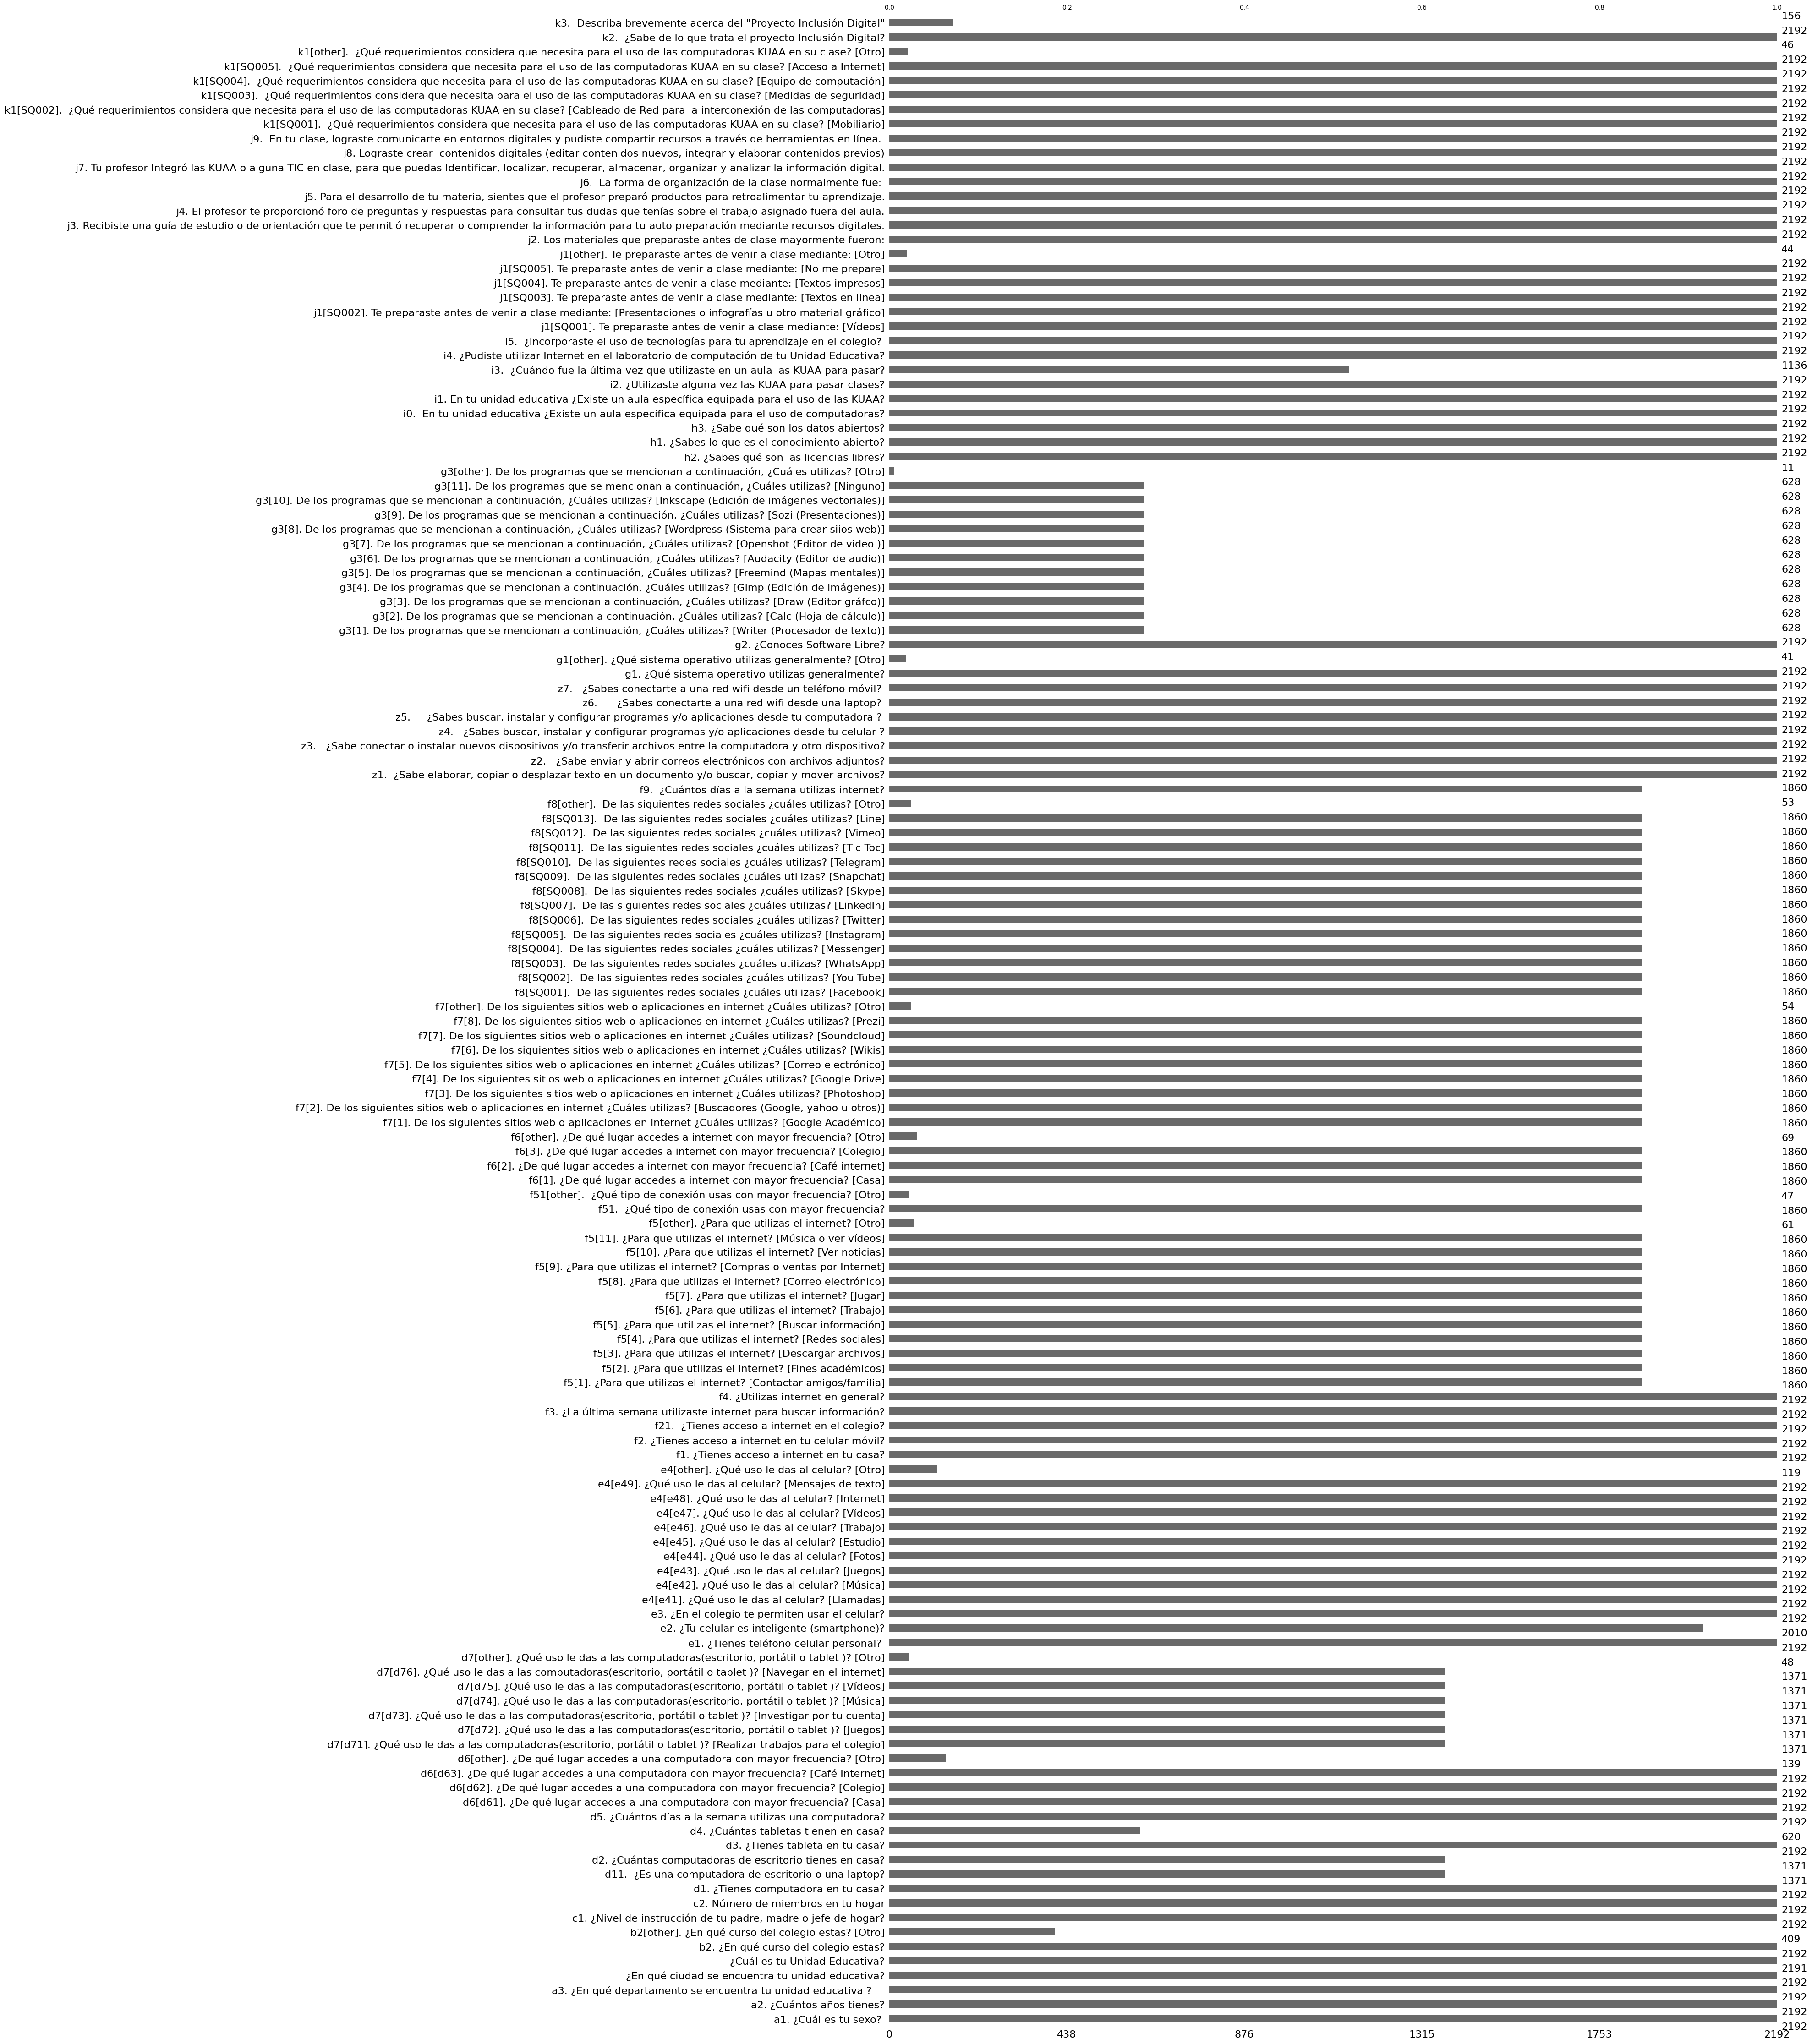

In [43]:
# Verificar existencia de valores perdidos
missingno.bar(estudiantes_inicial_df)

In [ ]:
df = estudiantes_inicial_df.copy()

In [ ]:
df

a1. ¿Cuál es tu sexo?   a2. ¿Cuántos años tienes?  \
0                  Femenino                         17   
1                  Femenino                         15   
2                  Femenino                         16   
3                  Femenino                         16   
4                  Femenino                         16   
...                     ...                        ...   
2187              Masculino                         15   
2188              Masculino                         14   
2189              Masculino                         15   
2190              Masculino                         15   
2191              Masculino                         15   

     a3. ¿En qué departamento se encuentra tu unidad educativa ?      \
0                                            Chuquisaca                
1                                            Chuquisaca                
2                                            Chuquisaca                
3                                            Chuquisaca                
4                                            Chuquisaca                
...                                                 ...                
2187                                         Santa Cruz                
2188                                         Santa Cruz                
2189                                         Santa Cruz                
2190                                         Santa Cruz                
2191                                         Santa Cruz                

     ¿En qué ciudad se encuentra tu unidad educativa?  \
0                                               Sucre   
1                                               Sucre   
2                                               Sucre   
3                                               Sucre   
4                                               Sucre   
...                                               ...   
2187                          Santa Cruz de la Sierra   
2188                          Santa Cruz de la Sierra   
2189                          Santa Cruz de la Sierra   
2190                          Santa Cruz de la Sierra   
2191                          Santa Cruz de la Sierra   

           ¿Cuál es tu Unidad Educativa? b2. ¿En qué curso del colegio estas?  \
0                            LA RECOLETA                        4° Secundaria   
1     LICEO MILITAR TTE. EDMUNDO ANDRADE                        4° Secundaria   
2                     MARIA JOSEFA MUJIA                        5° Secundaria   
3                          MCAL. SUCRE B                                 Otro   
4                     MARIA JOSEFA MUJIA                        4° Secundaria   
...                                  ...                                  ...   
2187                  PADRE JAIME GAGNON                        4° Secundaria   
2188                  PADRE JAIME GAGNON                        4° Secundaria   
2189                  PADRE JAIME GAGNON                        4° Secundaria   
2190                  PADRE JAIME GAGNON                        4° Secundaria   
2191                  PADRE JAIME GAGNON                        4° Secundaria   

     b2[other]. ¿En qué curso del colegio estas? [Otro]  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                      3 de secundaria    
4                                                   NaN   
...                                                 ...   
2187                                                NaN   
2188                                                NaN   
2189                                                NaN   
2190                                                NaN   
2191                                                NaN   

     c1. ¿Nivel de instrucción de tu padre, madre o jefe de hogar?  \
0     

b2[other]. ¿En qué curso del colegio estas? [Otro]
d6[other]. ¿De qué lugar accedes a una computadora con mayor frecuencia? [Otro]
d7[other]. ¿Qué uso le das a las computadoras(escritorio, portátil o tablet )? [Otro]
e4[other]. ¿Qué uso le das al celular? [Otro]
f5[other]. ¿Para que utilizas el internet? [Otro]
f51[other].  ¿Qué tipo de conexión usas con mayor frecuencia? [Otro]
f6[other]. ¿De qué lugar accedes a internet con mayor frecuencia? [Otro]
f7[other]. De los siguientes sitios web o aplicaciones en internet ¿Cuáles utilizas? [Otro]
f8[other].  De las siguientes redes sociales ¿cuáles utilizas? [Otro]
g1[other]. ¿Qué sistema operativo utilizas generalmente? [Otro]
g3[other]. De los programas que se mencionan a continuación, ¿Cuáles utilizas? [Otro]
j1[other]. Te preparaste antes de venir a clase mediante: [Otro]
k1[other].  ¿Qué requerimientos considera que necesita para el uso de las computadoras KUAA en su clase? [Otro]


<Axes: >

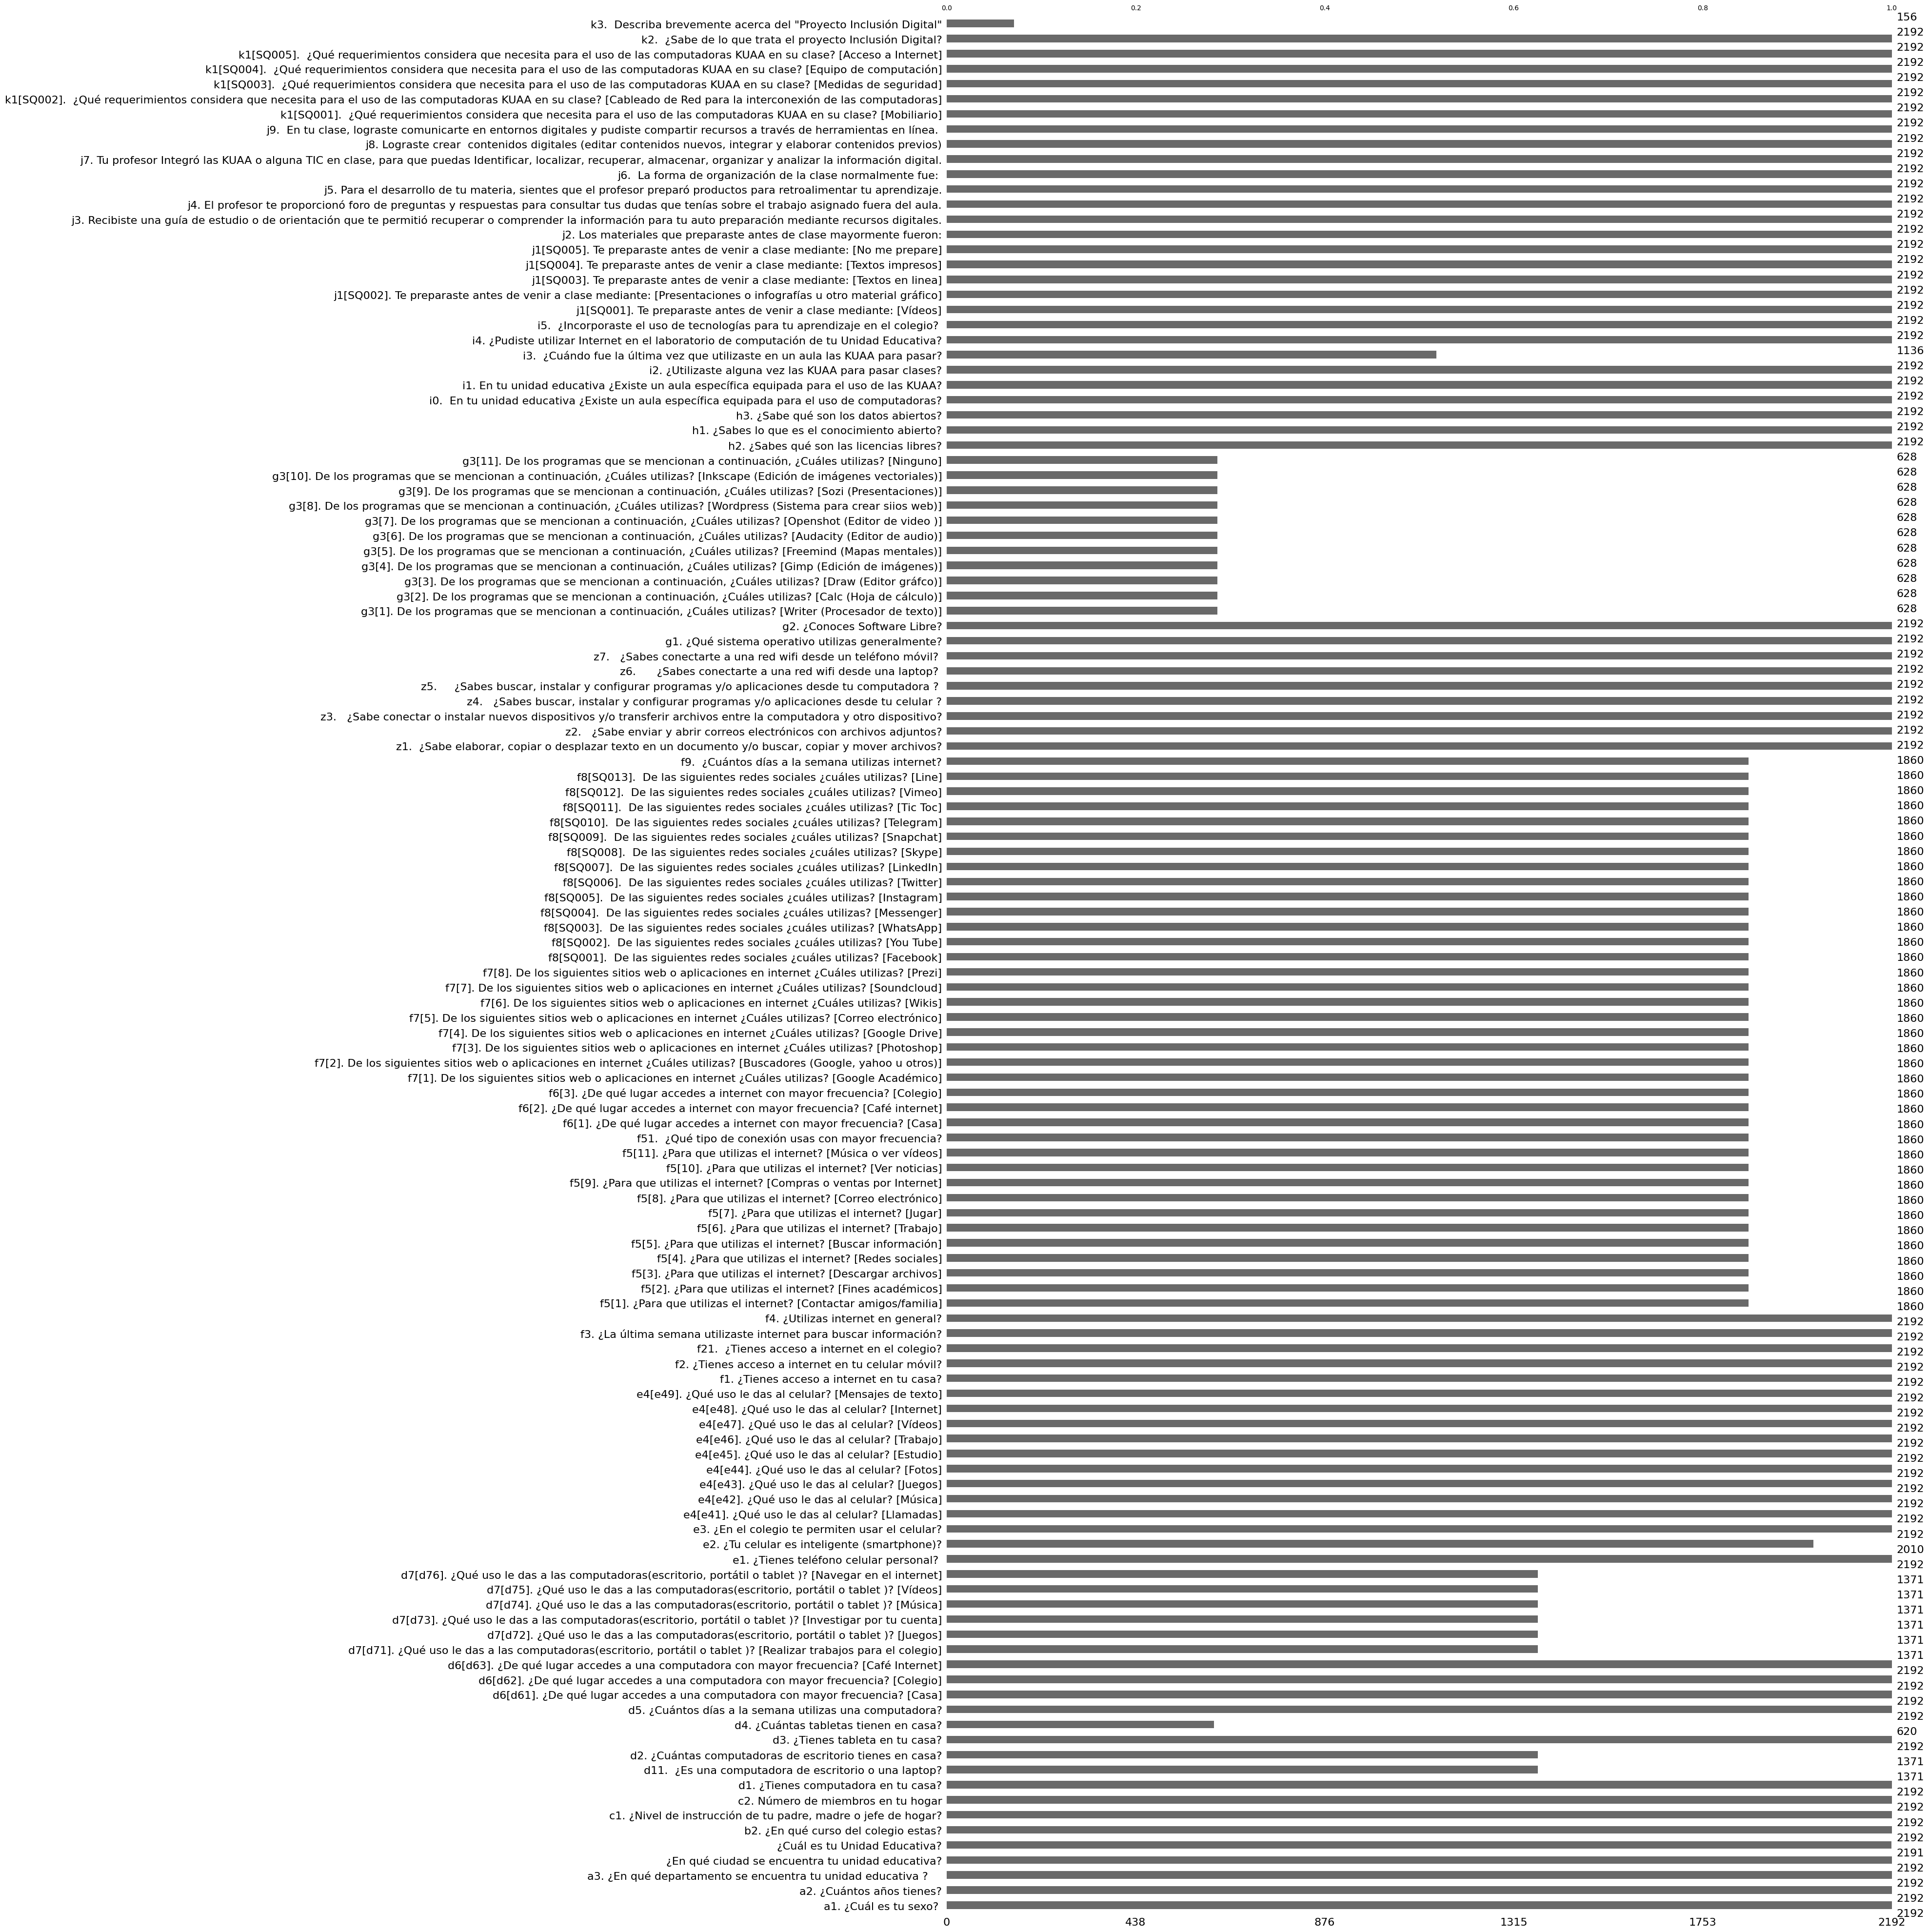

In [ ]:
for col in df.columns:
  if col[-6:] == '[Otro]':
    print(col)
    df = df.drop(columns=col)
missingno.bar(df)

In [ ]:
# Obtener la cantidad de filas en el DataFrame
n_filas = len(df)

# Obtener la cantidad de datos nulos en cada columna
nulos_por_columna = df.isnull().sum()

# Filtrar las columnas que tienen más del 50% de datos nulos
columnas_a_eliminar = nulos_por_columna[nulos_por_columna > (n_filas / 2)].index.tolist()

# Eliminar las columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar)

# Imprimir el DataFrame resultante
print(df)


In [ ]:
# 2. Eliminar las columnas que no son útiles para el análisis.
estudiantes_inicial_df = estudiantes_inicial_df.drop(['columna1', 'columna2'], axis=1)

In [ ]:

# 3. Tratar los valores faltantes o nulos de las columnas relevantes.
# Por ejemplo, si la columna "edad" tiene valores faltantes, se pueden llenar con la mediana o la media.
mediana_edad = estudiantes_inicial_df['edad'].median()
estudiantes_inicial_df['edad'].fillna(mediana_edad, inplace=True)


In [ ]:

# 4. Identificar y eliminar valores duplicados si existen.
estudiantes_inicial_df.drop_duplicates(inplace=True)


In [ ]:

# 5. Verificar si existen valores atípicos o fuera de rango, y decidir cómo tratarlos.
# Por ejemplo, si la columna "nota" tiene valores muy altos o muy bajos, se pueden eliminar o corregir.
estudiantes_inicial_df = estudiantes_inicial_df[(estudiantes_inicial_df['nota'] >= 0) & (estudiantes_inicial_df['nota'] <= 20)]


In [ ]:
df.shape, df2.shape

In [ ]:
df.describe(include="all")

In [ ]:
df2.describe(include="all")

In [ ]:
df.columns

In [ ]:
# chi cuadrado
from scipy.stats import chi2_contingency

# Realizar el test de chi-cuadrado en las tablas de frecuencia
chi2, p, dof, expected = chi2_contingency([tabla_inicial.values, tabla_final.values])

# Imprimir los resultados del test
print("Test de Chi-cuadrado:")
print("Estadístico de prueba: ", chi2)
print("Valor p: ", p)
print("Grados de libertad: ", dof)
print("Valores esperados: ")
print(expected)


In [ ]:
df2.columns

In [ ]:
df.columns[0]

In [ ]:
sns.__version__

In [ ]:
dfe = sns.load_dataset("titanic")
sns.countplot(x=dfe["class"])

In [ ]:
dfe["class"].head()

In [ ]:
type(dfe["class"])

In [ ]:
#!pip install seaborn==0.11.2

In [ ]:
type(df[df.columns[0]])

In [ ]:
print(df.columns[0])

In [ ]:
sns.countplot(x=df[df.columns[0]], data=df)

In [ ]:
df = estudiantes_inicial_df.copy()

In [ ]:
for colet in df.columns:
  counter = df[colet].value_counts().to_frame()
  sns.countplot(x=df[colet], data=df)
  plt.show()
  
  print(counter)
  print(" ")

In [ ]:
len(counter)

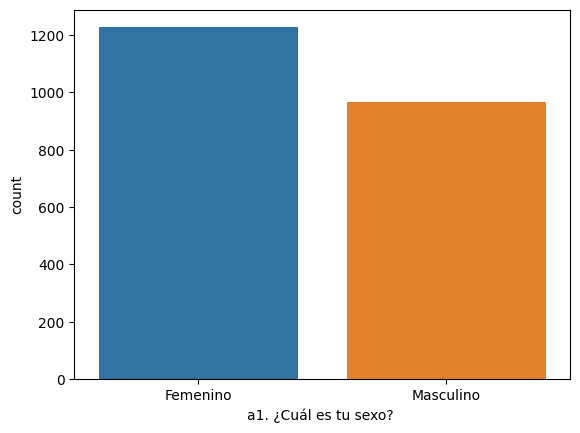

           a1. ¿Cuál es tu sexo? 
Femenino                     1227
Masculino                     965
 


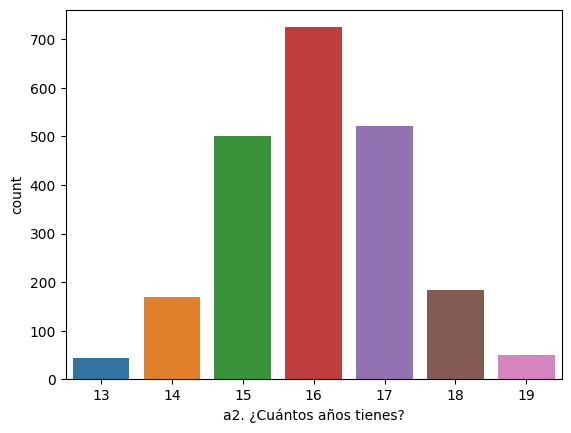

    a2. ¿Cuántos años tienes?
16                        725
17                        522
15                        500
18                        183
14                        169
19                         49
13                         44
 


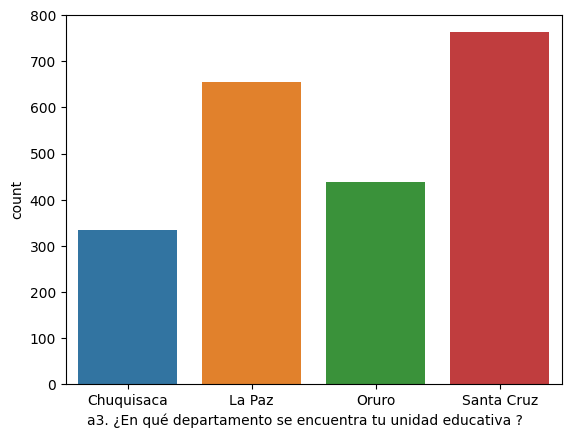

            a3. ¿En qué departamento se encuentra tu unidad educativa ?    
Santa Cruz                                                763              
La Paz                                                    656              
Oruro                                                     438              
Chuquisaca                                                335              
 


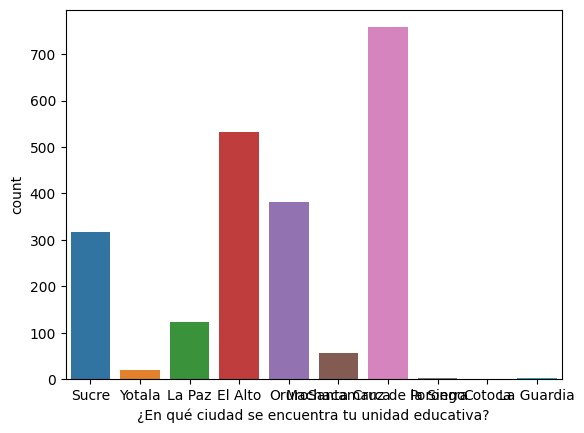

                         ¿En qué ciudad se encuentra tu unidad educativa?
Santa Cruz de la Sierra                                               758
El Alto                                                               533
Oruro                                                                 381
Sucre                                                                 316
La Paz                                                                123
Machacamarca                                                           57
Yotala                                                                 19
Porongo                                                                 2
La Guardia                                                              2
Cotoca                                                                  1
 
                                     ¿Cuál es tu Unidad Educativa?
REPUBLICA DEL JAPON MAÑANA                                     199
DONATO VASQUEZ SECUNDARIO                         

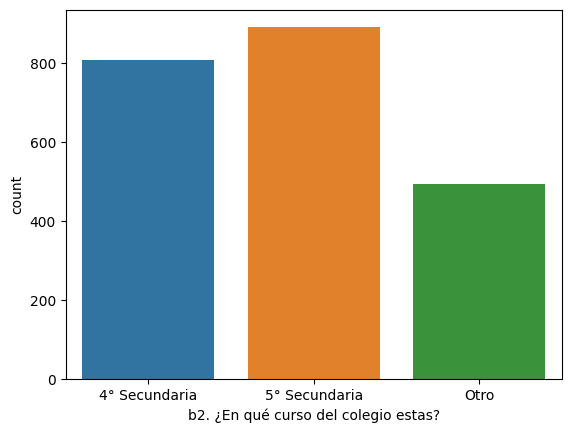

               b2. ¿En qué curso del colegio estas?
5° Secundaria                                   891
4° Secundaria                                   807
Otro                                            494
 
                   b2[other]. ¿En qué curso del colegio estas? [Otro]
6° Secundaria                                                     37 
3° Secundaria                                                     30 
6° secundaria                                                     28 
6 secundaria                                                      20 
6to                                                               17 
...                                                              ... 
6°de secundaria                                                    1 
6to sec                                                            1 
6to de Secundario                                                  1 
1 csecundara                                                       1 
3 B                 

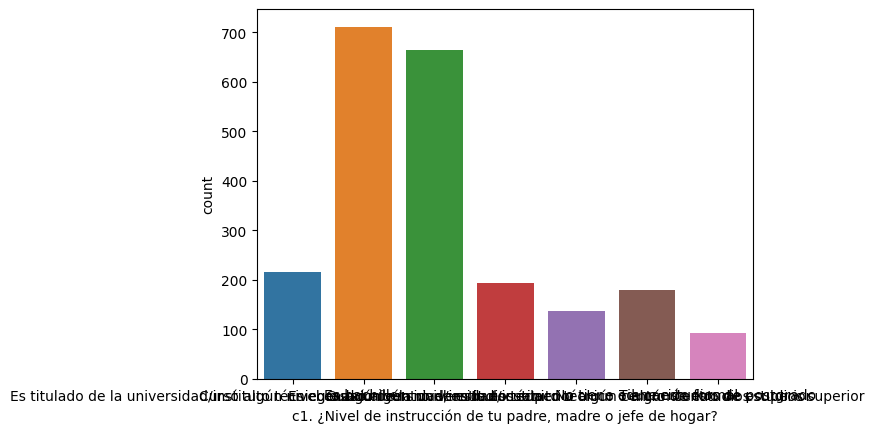

                                                    c1. ¿Nivel de instrucción de tu padre, madre o jefe de hogar?
Es bachiller                                                                                      711            
Cursó algún nivel en la escuela                                                                   663            
Es titulado de la universidad/instituto técnico...                                                215            
Cursó algún nivel en la universidad/instituto t...                                                194            
No tiene educación formal                                                                         180            
Es egresado de la universidad/instituto técnico...                                                136            
Tiene estudios de postgrado                                                                        93            
 
    c2. Número de miembros en tu hogar
5                                  540
6       

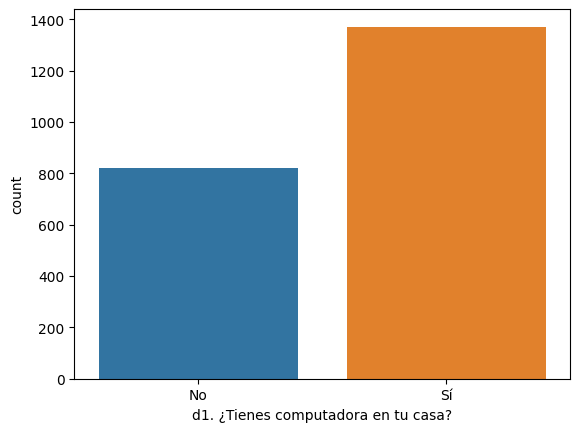

    d1. ¿Tienes computadora en tu casa?
Sí                                 1371
No                                  821
 


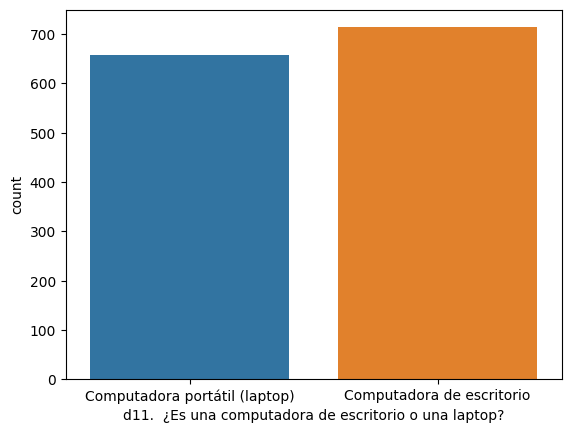

                               d11.  ¿Es una computadora de escritorio o una laptop?
Computadora de escritorio                                                    714    
Computadora portátil (laptop)                                                657    
 
      d2. ¿Cuántas computadoras de escritorio tienes en casa?
1.0                                                1037      
2.0                                                 207      
3.0                                                  66      
4.0                                                  19      
11.0                                                 17      
5.0                                                  12      
6.0                                                   3      
99.0                                                  2      
7.0                                                   1      
17.0                                                  1      
33.0                                                  1      

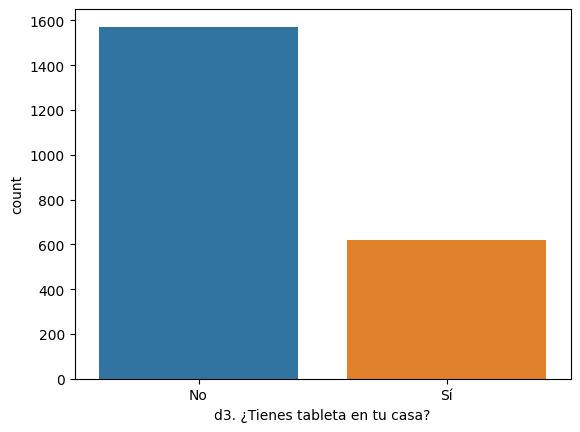

    d3. ¿Tienes tableta en tu casa?
No                             1572
Sí                              620
 


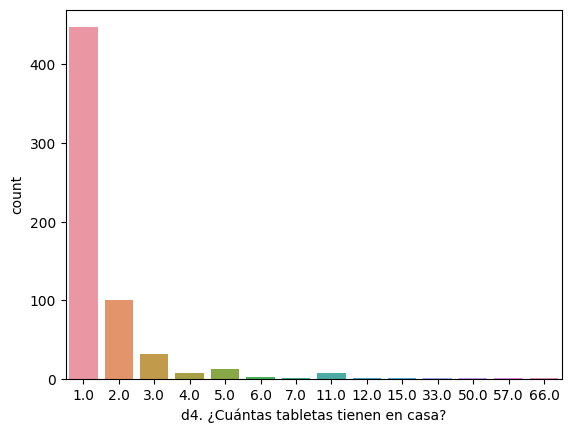

      d4. ¿Cuántas tabletas tienen en casa?
1.0                                     447
2.0                                     100
3.0                                      32
5.0                                      13
4.0                                       8
11.0                                      8
6.0                                       3
12.0                                      2
7.0                                       2
57.0                                      1
15.0                                      1
33.0                                      1
66.0                                      1
50.0                                      1
 


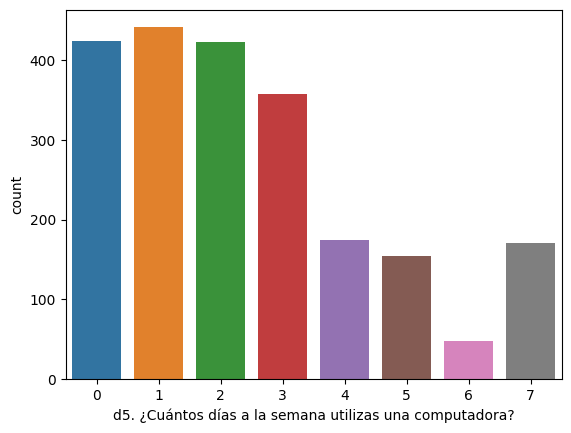

   d5. ¿Cuántos días a la semana utilizas una computadora?
1                                                441      
0                                                424      
2                                                423      
3                                                357      
4                                                174      
7                                                171      
5                                                154      
6                                                 48      
 


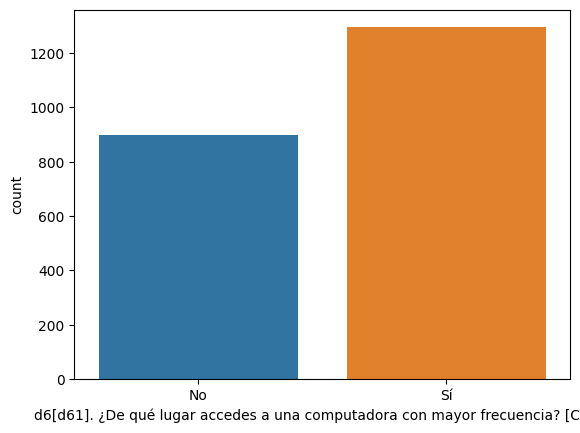

    d6[d61]. ¿De qué lugar accedes a una computadora con mayor frecuencia? [Casa]
Sí                                               1295                            
No                                                897                            
 


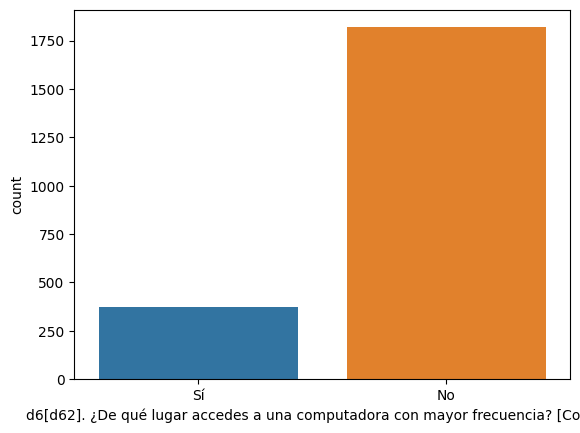

    d6[d62]. ¿De qué lugar accedes a una computadora con mayor frecuencia? [Colegio]
No                                               1819                               
Sí                                                373                               
 


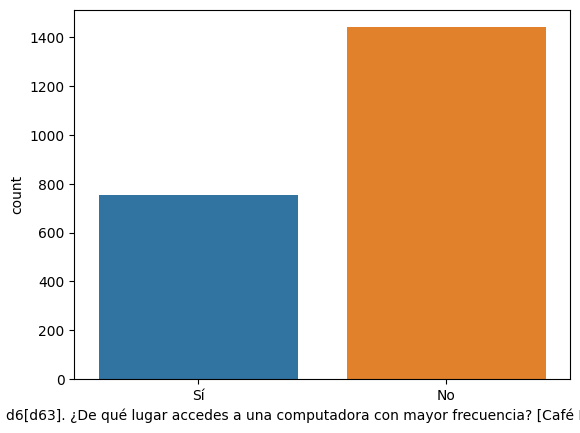

    d6[d63]. ¿De qué lugar accedes a una computadora con mayor frecuencia? [Café Internet]
No                                               1440                                     
Sí                                                752                                     
 
                              d6[other]. ¿De qué lugar accedes a una computadora con mayor frecuencia? [Otro]
ninguno                                                                      13                              
internet                                                                     13                              
Internet                                                                     12                              
1                                                                             7                              
Internet                                                                      5                              
...                                                              

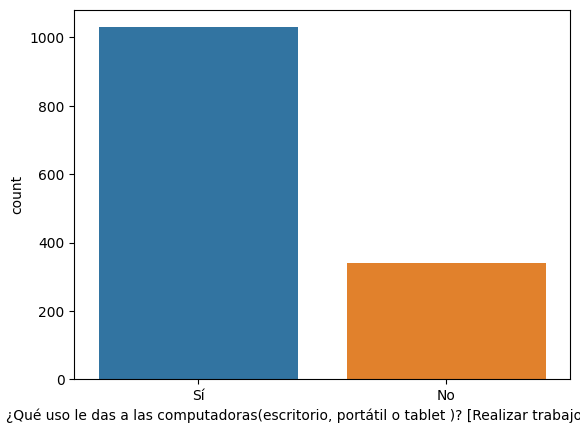

    d7[d71]. ¿Qué uso le das a las computadoras(escritorio, portátil o tablet )? [Realizar trabajos para el colegio]
Sí                                               1030                                                               
No                                                341                                                               
 


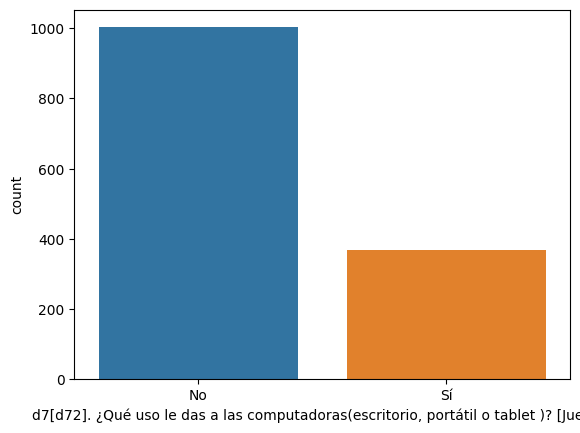

    d7[d72]. ¿Qué uso le das a las computadoras(escritorio, portátil o tablet )? [Juegos]
No                                               1003                                    
Sí                                                368                                    
 


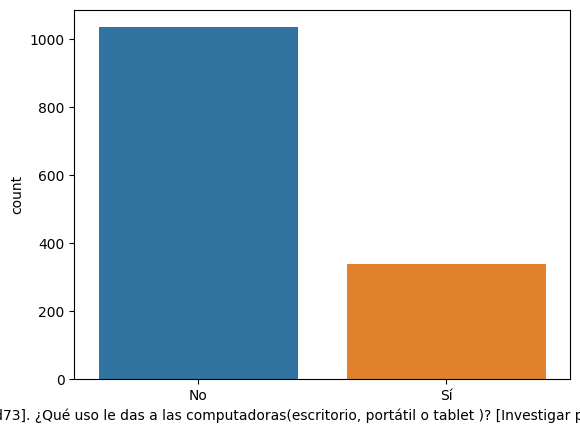

    d7[d73]. ¿Qué uso le das a las computadoras(escritorio, portátil o tablet )? [Investigar por tu cuenta]
No                                               1034                                                      
Sí                                                337                                                      
 


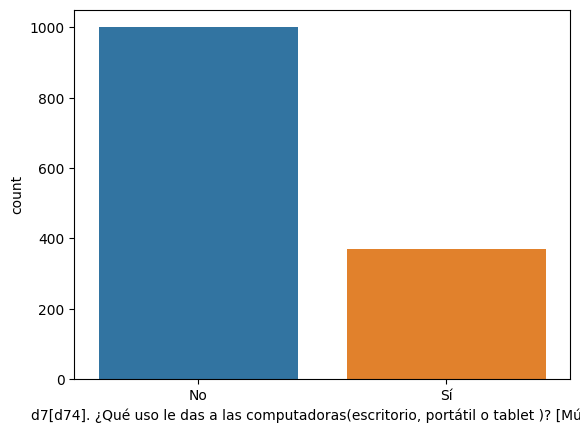

    d7[d74]. ¿Qué uso le das a las computadoras(escritorio, portátil o tablet )? [Música]
No                                               1000                                    
Sí                                                371                                    
 


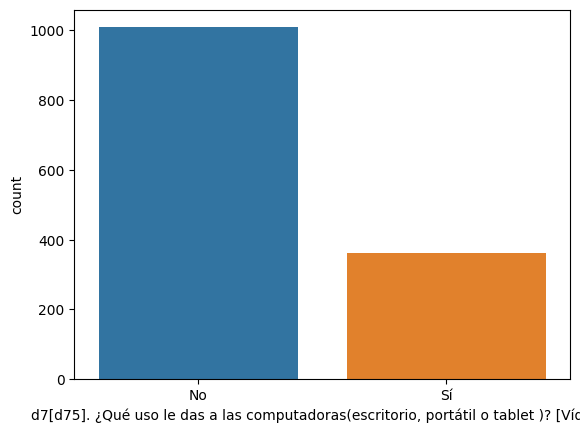

    d7[d75]. ¿Qué uso le das a las computadoras(escritorio, portátil o tablet )? [Vídeos]
No                                               1009                                    
Sí                                                362                                    
 


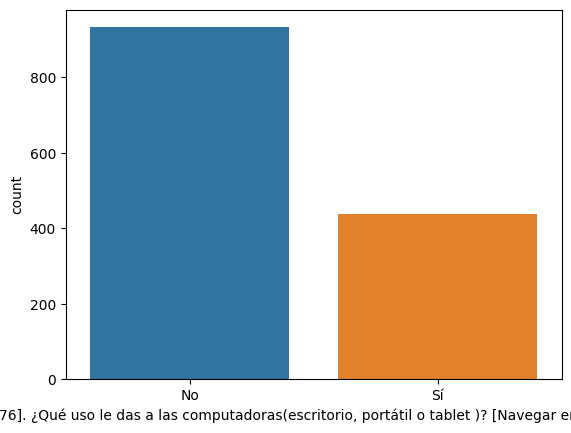

    d7[d76]. ¿Qué uso le das a las computadoras(escritorio, portátil o tablet )? [Navegar en el internet]
No                                                933                                                    
Sí                                                438                                                    
 
                                                    d7[other]. ¿Qué uso le das a las computadoras(escritorio, portátil o tablet )? [Otro]
juegos y trabajos                                                                                   2                                    
todos                                                                                               2                                    
todas las anteriores                                                                                2                                    
todo                                                                                                1                           

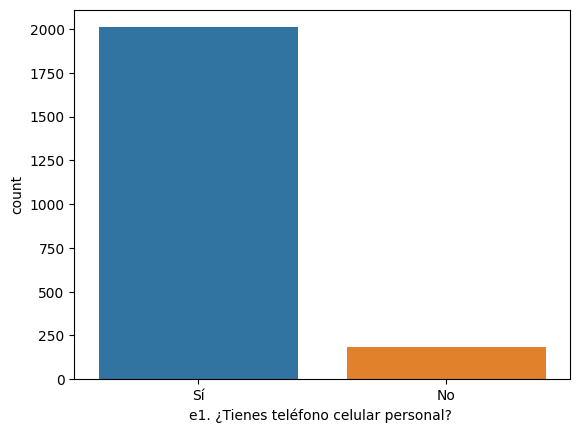

    e1. ¿Tienes teléfono celular personal? 
Sí                                     2010
No                                      182
 


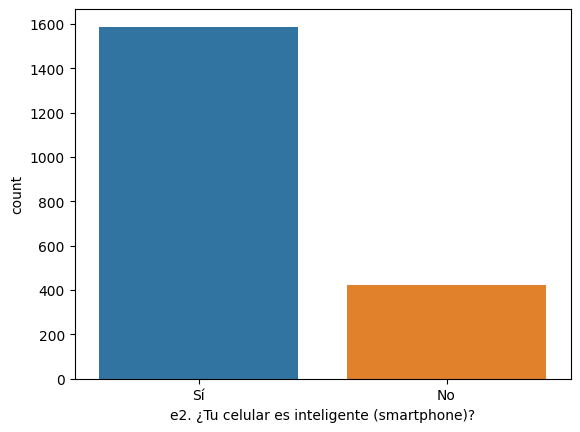

    e2. ¿Tu celular es inteligente (smartphone)?
Sí                                          1588
No                                           422
 


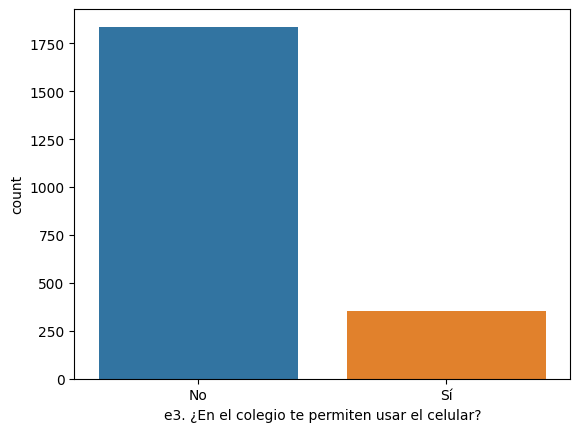

    e3. ¿En el colegio te permiten usar el celular?
No                                             1837
Sí                                              355
 


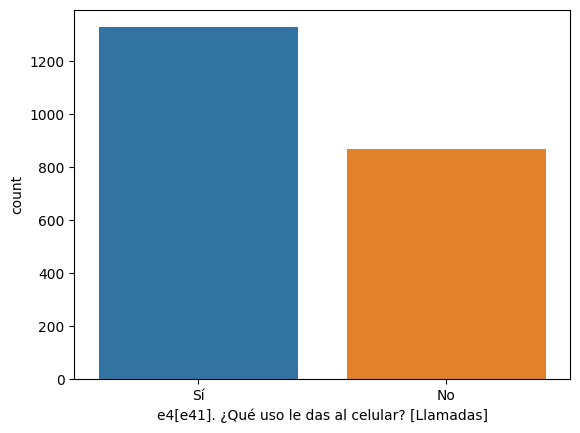

    e4[e41]. ¿Qué uso le das al celular? [Llamadas]
Sí                                             1326
No                                              866
 


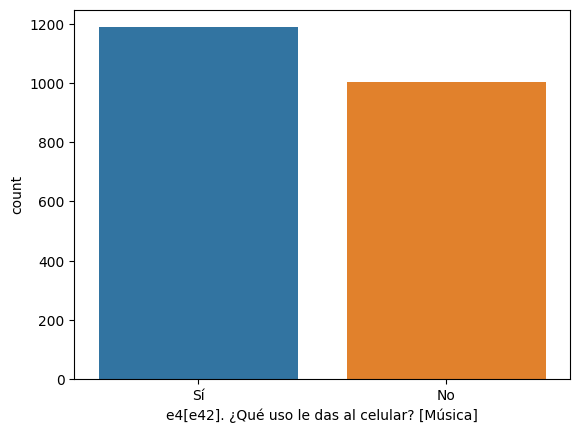

    e4[e42]. ¿Qué uso le das al celular? [Música]
Sí                                           1188
No                                           1004
 


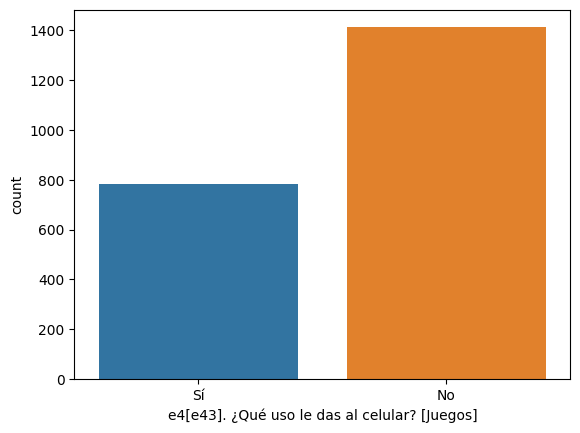

    e4[e43]. ¿Qué uso le das al celular? [Juegos]
No                                           1411
Sí                                            781
 


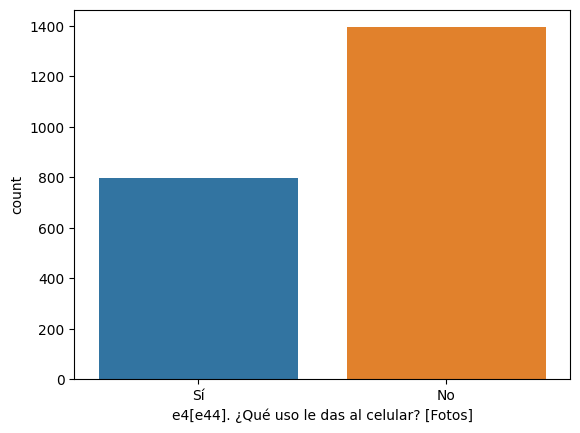

    e4[e44]. ¿Qué uso le das al celular? [Fotos]
No                                          1394
Sí                                           798
 


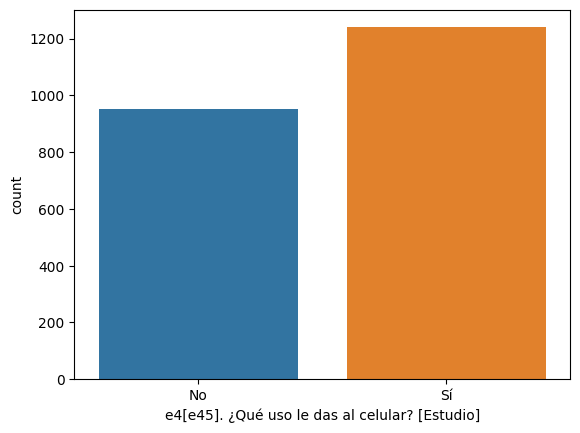

    e4[e45]. ¿Qué uso le das al celular? [Estudio]
Sí                                            1240
No                                             952
 


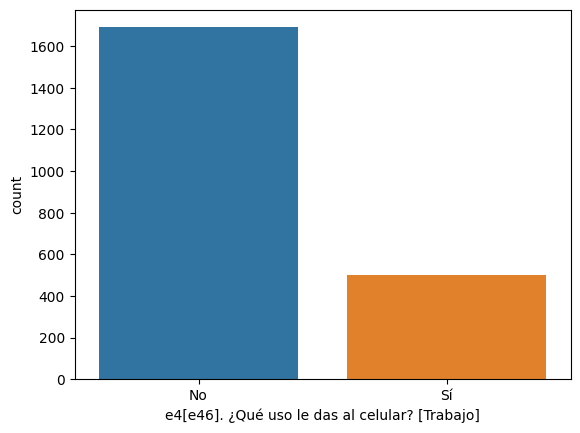

    e4[e46]. ¿Qué uso le das al celular? [Trabajo]
No                                            1691
Sí                                             501
 


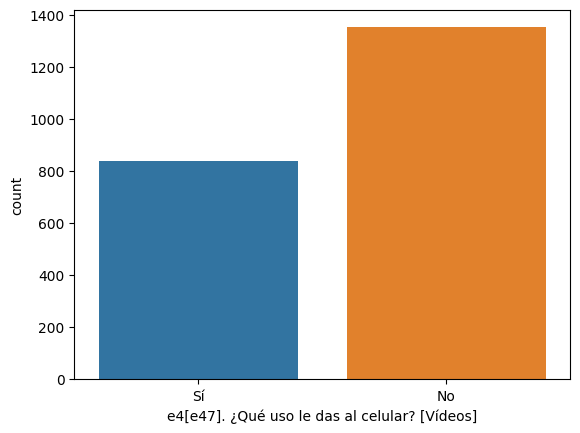

    e4[e47]. ¿Qué uso le das al celular? [Vídeos]
No                                           1352
Sí                                            840
 


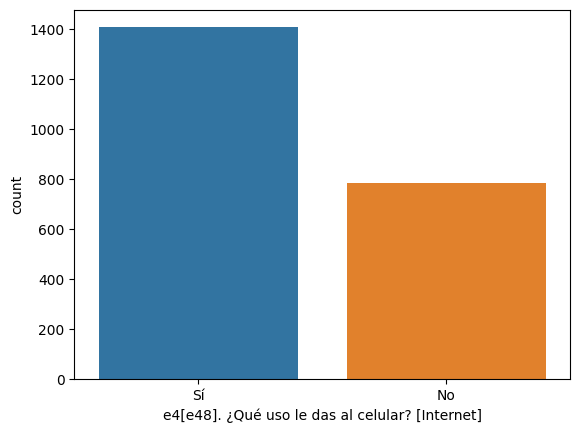

    e4[e48]. ¿Qué uso le das al celular? [Internet]
Sí                                             1407
No                                              785
 


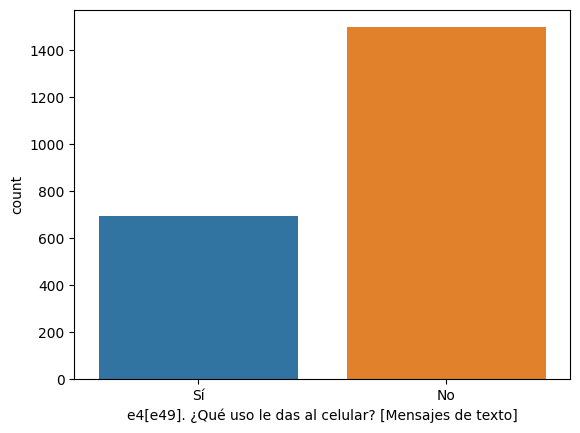

    e4[e49]. ¿Qué uso le das al celular? [Mensajes de texto]
No                                               1498       
Sí                                                694       
 
                          e4[other]. ¿Qué uso le das al celular? [Otro]
no tengo                                                             10
Todo                                                                  7
todos                                                                 6
todas las anteriores                                                  5
nada                                                                  4
...                                                                 ...
Uso para todas las cosas                                              1
Jugar free fire                                                       1
Investigaciones                                                       1
whats, facebook                                                       1
WHATSAPP               

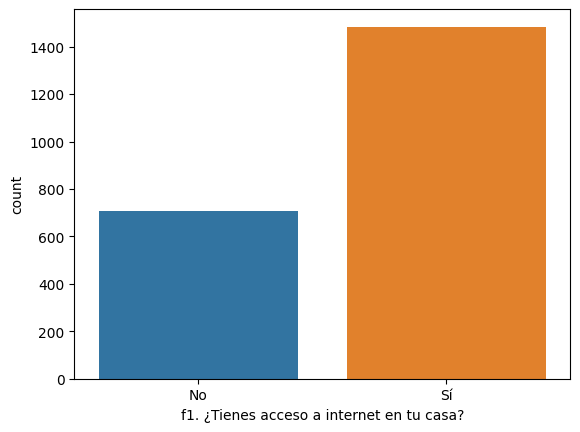

    f1. ¿Tienes acceso a internet en tu casa?
Sí                                       1484
No                                        708
 


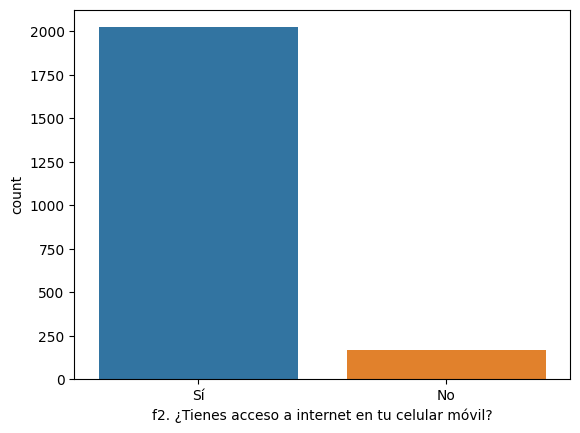

    f2. ¿Tienes acceso a internet en tu celular móvil?
Sí                                               2023 
No                                                169 
 


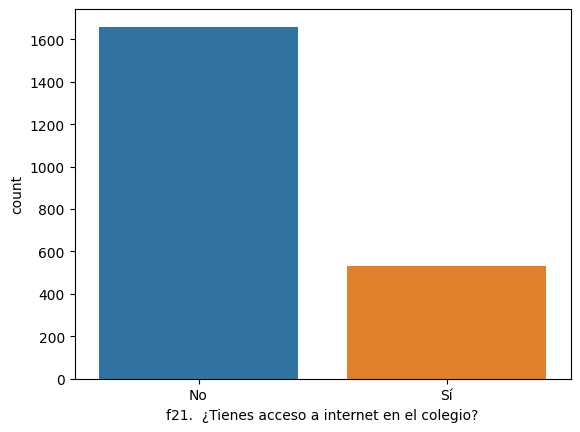

    f21.  ¿Tienes acceso a internet en el colegio?
No                                            1660
Sí                                             532
 


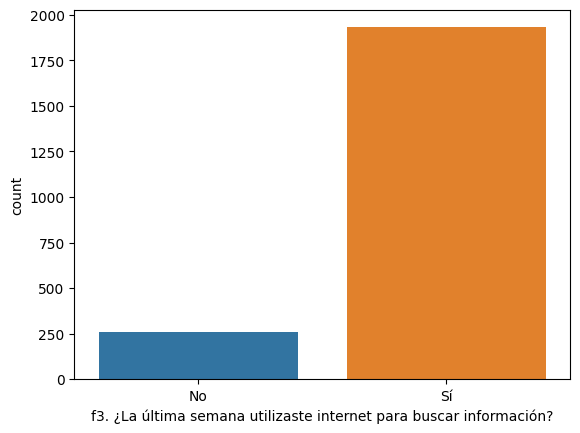

    f3. ¿La última semana utilizaste internet para buscar información?
Sí                                               1932                 
No                                                260                 
 


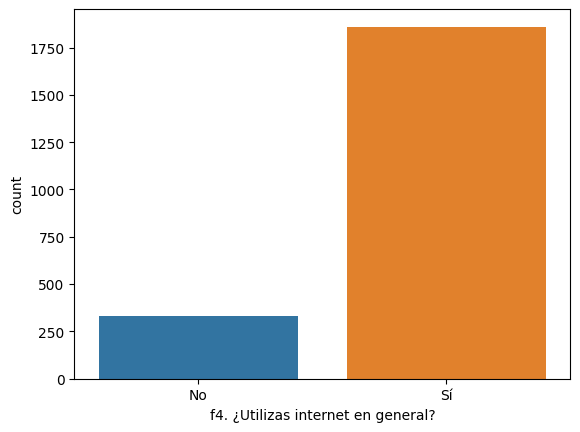

    f4. ¿Utilizas internet en general?
Sí                                1860
No                                 332
 


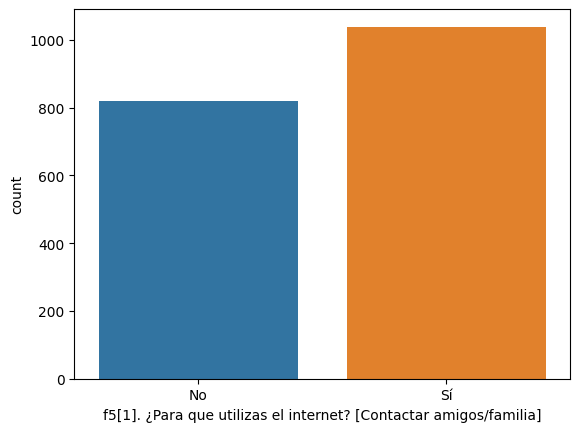

    f5[1]. ¿Para que utilizas el internet? [Contactar amigos/familia]
Sí                                               1039                
No                                                821                
 


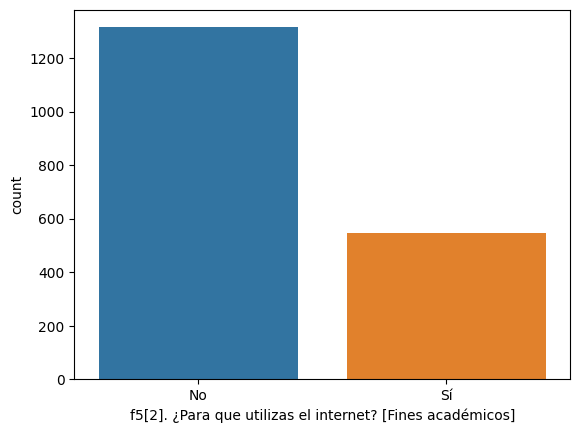

    f5[2]. ¿Para que utilizas el internet? [Fines académicos]
No                                               1315        
Sí                                                545        
 


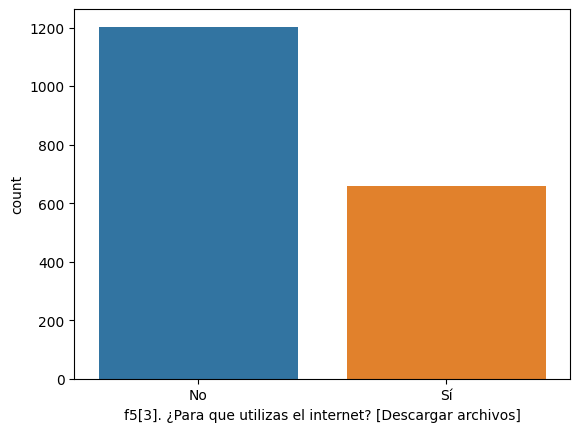

    f5[3]. ¿Para que utilizas el internet? [Descargar archivos]
No                                               1203          
Sí                                                657          
 


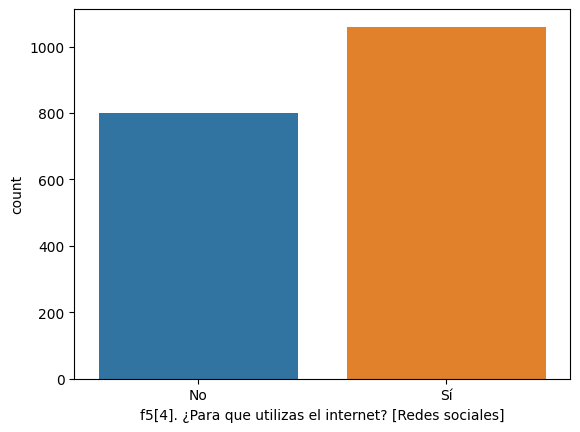

    f5[4]. ¿Para que utilizas el internet? [Redes sociales]
Sí                                               1060      
No                                                800      
 


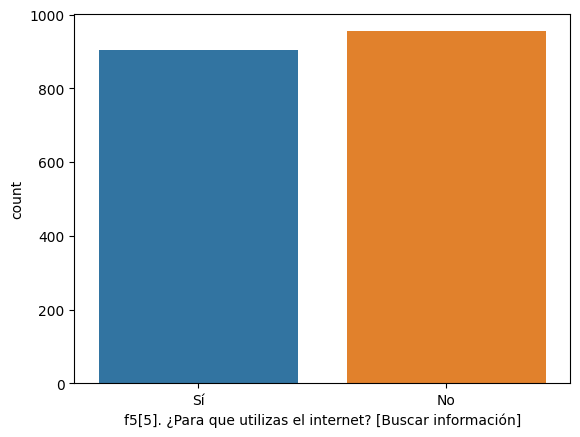

    f5[5]. ¿Para que utilizas el internet? [Buscar información]
No                                                955          
Sí                                                905          
 


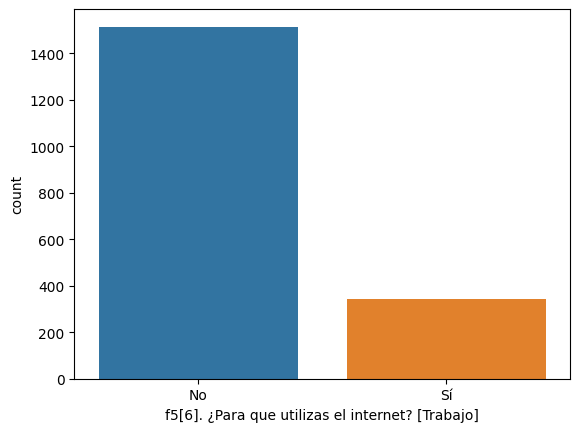

    f5[6]. ¿Para que utilizas el internet? [Trabajo]
No                                              1515
Sí                                               345
 


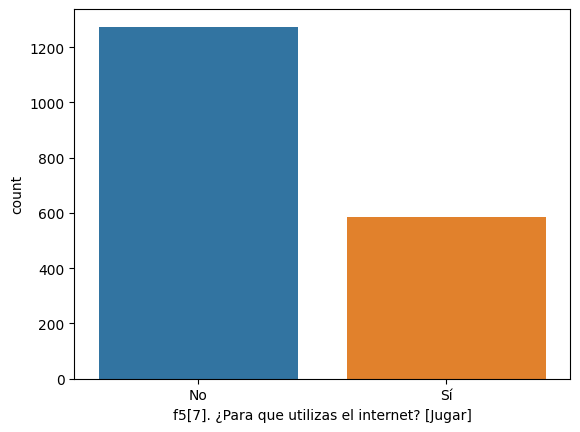

    f5[7]. ¿Para que utilizas el internet? [Jugar]
No                                            1274
Sí                                             586
 


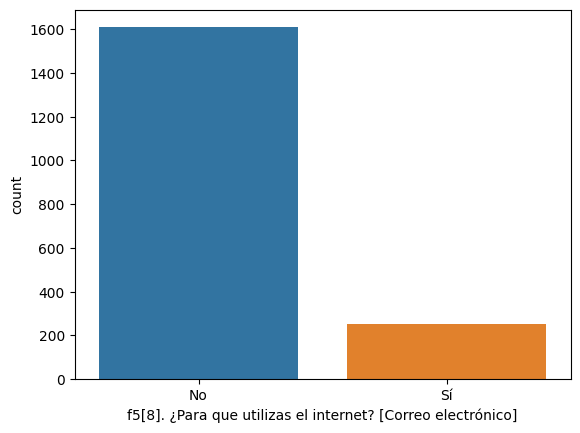

    f5[8]. ¿Para que utilizas el internet? [Correo electrónico]
No                                               1609          
Sí                                                251          
 


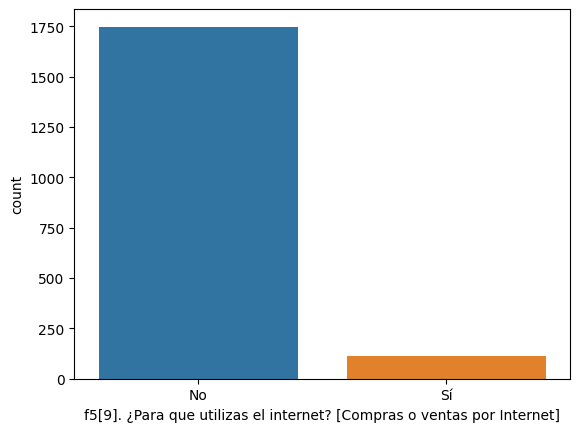

    f5[9]. ¿Para que utilizas el internet? [Compras o ventas por Internet]
No                                               1748                     
Sí                                                112                     
 


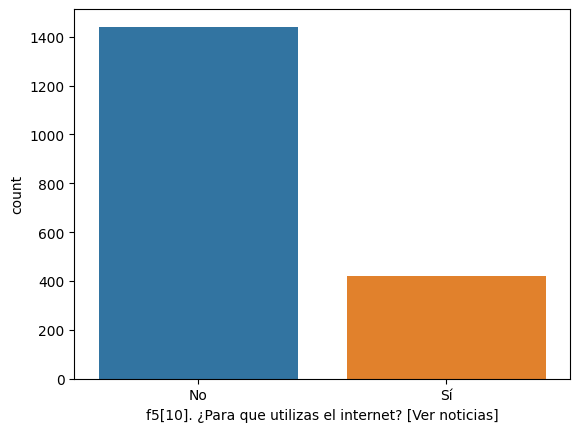

    f5[10]. ¿Para que utilizas el internet? [Ver noticias]
No                                               1441     
Sí                                                419     
 


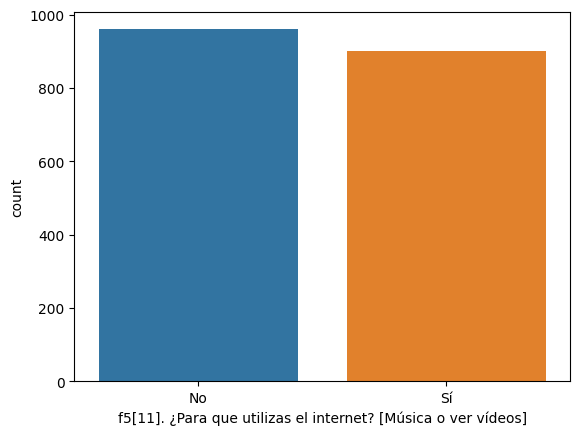

    f5[11]. ¿Para que utilizas el internet? [Música o ver vídeos]
No                                                960            
Sí                                                900            
 
                                                    f5[other]. ¿Para que utilizas el internet? [Otro]
Todo                                                                                                6
para todo                                                                                           4
todo                                                                                                3
casi todo                                                                                           2
todos                                                                                               2
TODO                                                                                                1
icloud                                                                                

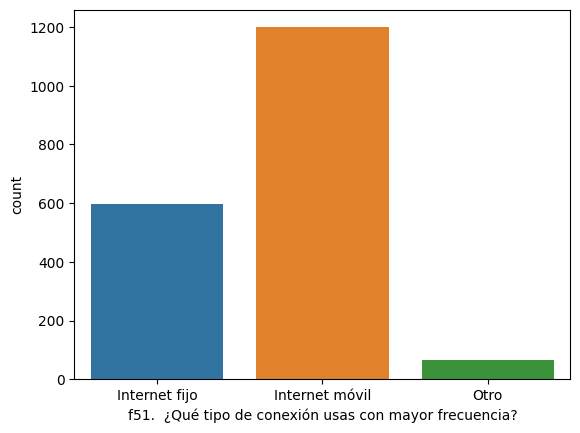

                f51.  ¿Qué tipo de conexión usas con mayor frecuencia?
Internet móvil                                               1199     
Internet fijo                                                 596     
Otro                                                           65     
 
                             f51[other].  ¿Qué tipo de conexión usas con mayor frecuencia? [Otro]
wifi                                                                         9                   
Wifi                                                                         8                   
ambos                                                                        4                   
Wi-fi                                                                        3                   
todos                                                                        2                   
wi-fi                                                                        2                   
wi fi                       

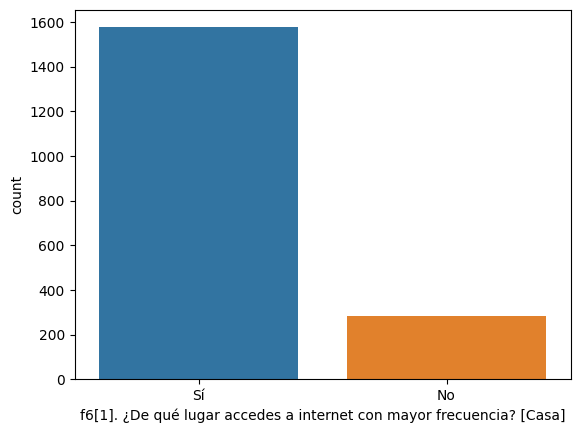

    f6[1]. ¿De qué lugar accedes a internet con mayor frecuencia? [Casa]
Sí                                               1576                   
No                                                284                   
 


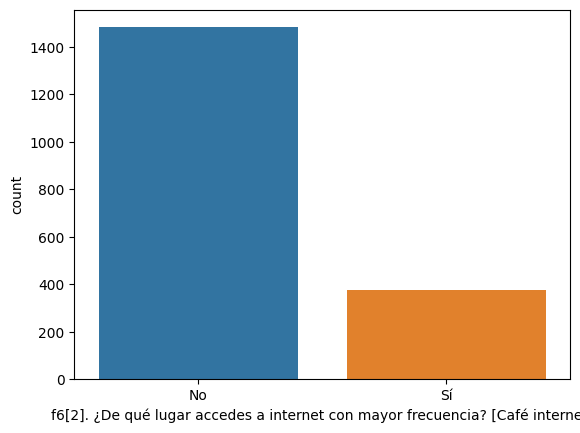

    f6[2]. ¿De qué lugar accedes a internet con mayor frecuencia? [Café internet]
No                                               1483                            
Sí                                                377                            
 


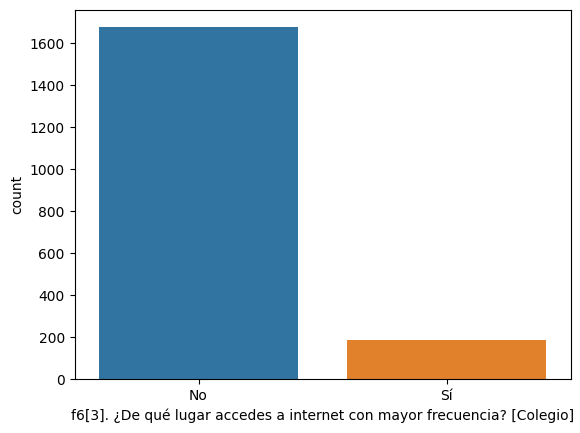

    f6[3]. ¿De qué lugar accedes a internet con mayor frecuencia? [Colegio]
No                                               1675                      
Sí                                                185                      
 
                                  f6[other]. ¿De qué lugar accedes a internet con mayor frecuencia? [Otro]
celular                                                                           7                       
Celular                                                                           6                       
Internet                                                                          5                       
internet                                                                          4                       
trabajo                                                                           3                       
Celular                                                                           3                       
1                    

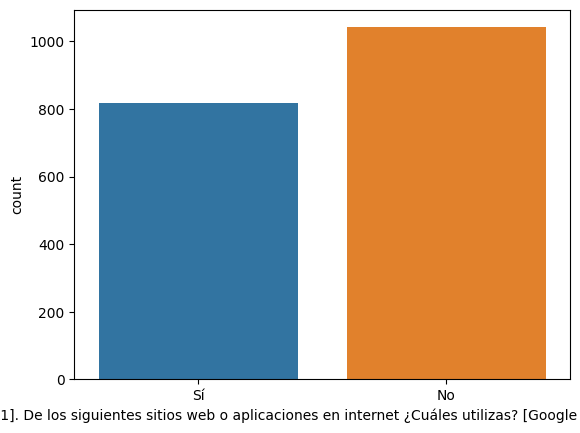

    f7[1]. De los siguientes sitios web o aplicaciones en internet ¿Cuáles utilizas? [Google Académico]
No                                               1042                                                  
Sí                                                818                                                  
 


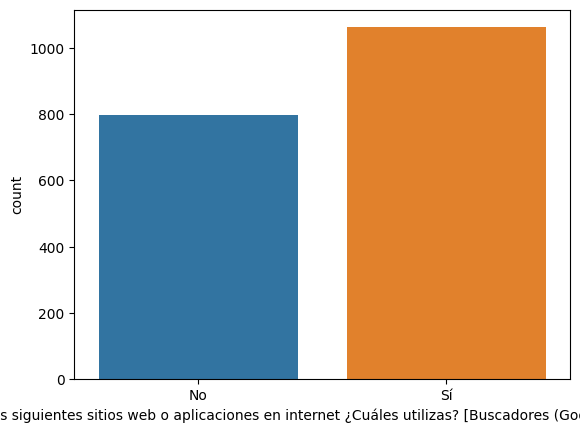

    f7[2]. De los siguientes sitios web o aplicaciones en internet ¿Cuáles utilizas? [Buscadores (Google, yahoo u otros)]
Sí                                               1062                                                                    
No                                                798                                                                    
 


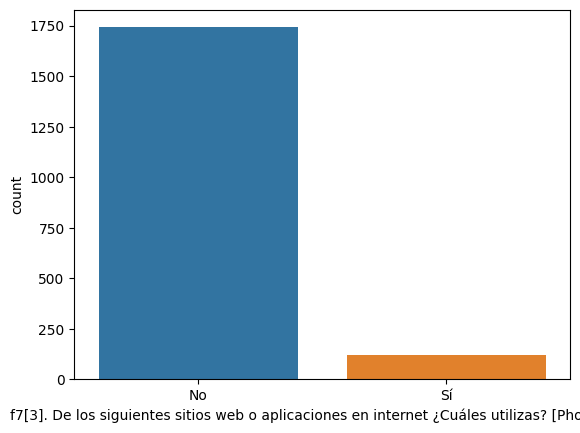

    f7[3]. De los siguientes sitios web o aplicaciones en internet ¿Cuáles utilizas? [Photoshop]
No                                               1742                                           
Sí                                                118                                           
 


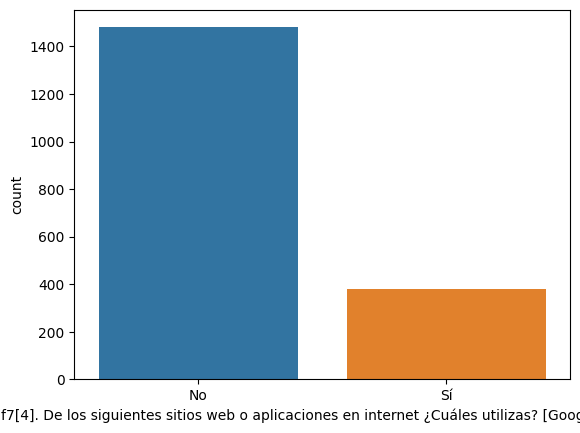

    f7[4]. De los siguientes sitios web o aplicaciones en internet ¿Cuáles utilizas? [Google Drive]
No                                               1481                                              
Sí                                                379                                              
 


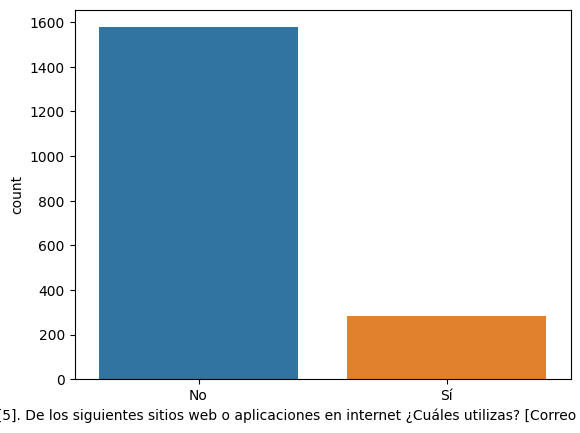

    f7[5]. De los siguientes sitios web o aplicaciones en internet ¿Cuáles utilizas? [Correo electrónico]
No                                               1577                                                    
Sí                                                283                                                    
 


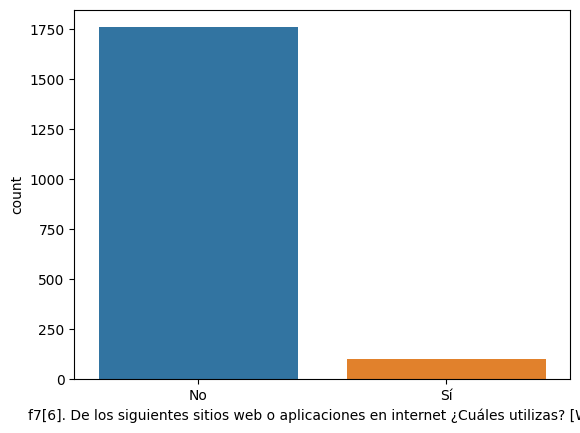

    f7[6]. De los siguientes sitios web o aplicaciones en internet ¿Cuáles utilizas? [Wikis]
No                                               1757                                       
Sí                                                103                                       
 


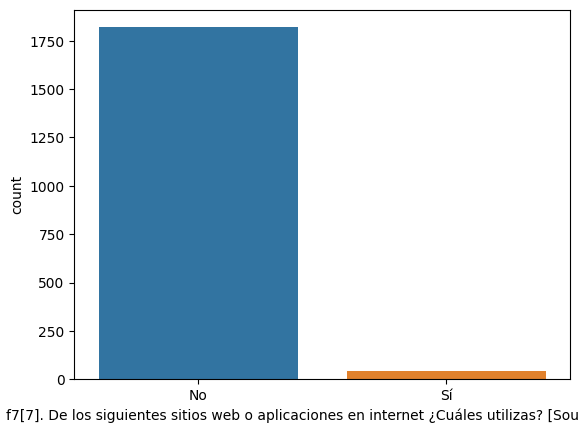

    f7[7]. De los siguientes sitios web o aplicaciones en internet ¿Cuáles utilizas? [Soundcloud]
No                                               1820                                            
Sí                                                 40                                            
 


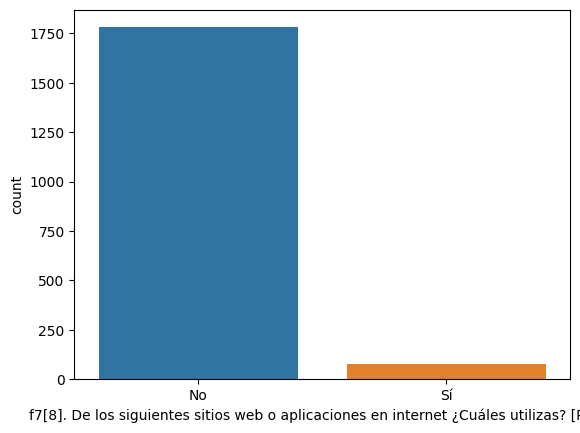

    f7[8]. De los siguientes sitios web o aplicaciones en internet ¿Cuáles utilizas? [Prezi]
No                                               1781                                       
Sí                                                 79                                       
 
                                                    f7[other]. De los siguientes sitios web o aplicaciones en internet ¿Cuáles utilizas? [Otro]
Facebook                                                                                            3                                          
youtube                                                                                             3                                          
google                                                                                              3                                          
YouTube                                                                                             2                                          

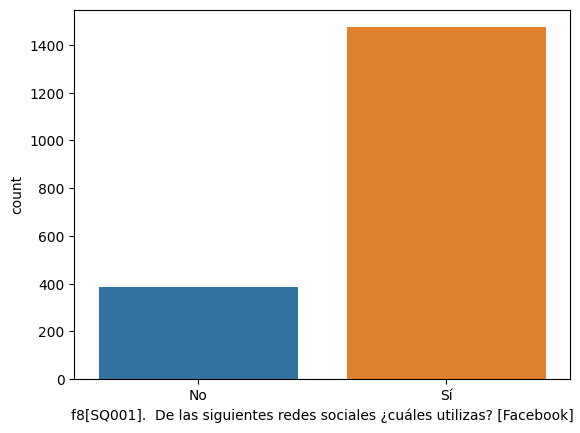

    f8[SQ001].  De las siguientes redes sociales ¿cuáles utilizas? [Facebook]
Sí                                               1474                        
No                                                386                        
 


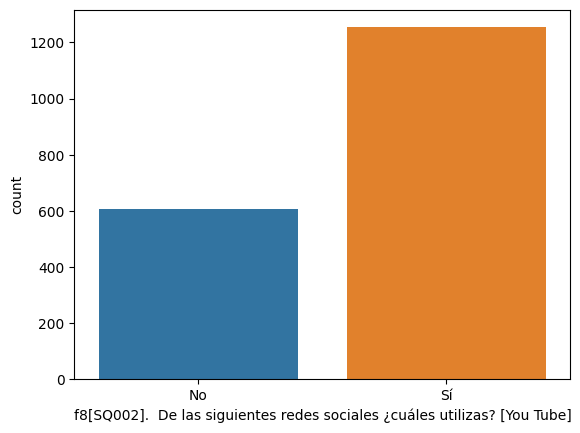

    f8[SQ002].  De las siguientes redes sociales ¿cuáles utilizas? [You Tube]
Sí                                               1254                        
No                                                606                        
 


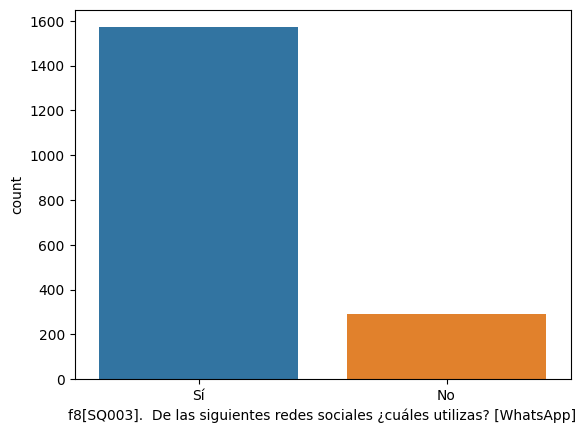

    f8[SQ003].  De las siguientes redes sociales ¿cuáles utilizas? [WhatsApp]
Sí                                               1571                        
No                                                289                        
 


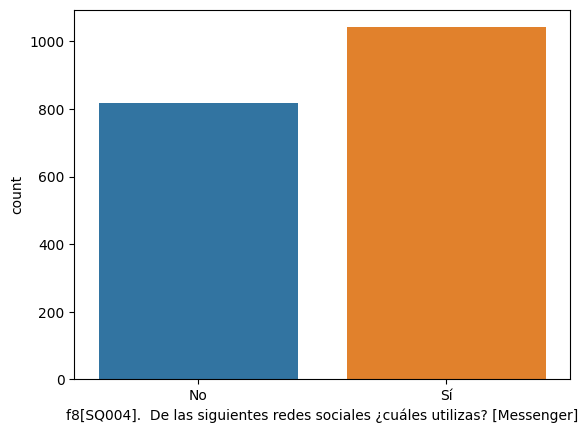

    f8[SQ004].  De las siguientes redes sociales ¿cuáles utilizas? [Messenger]
Sí                                               1042                         
No                                                818                         
 


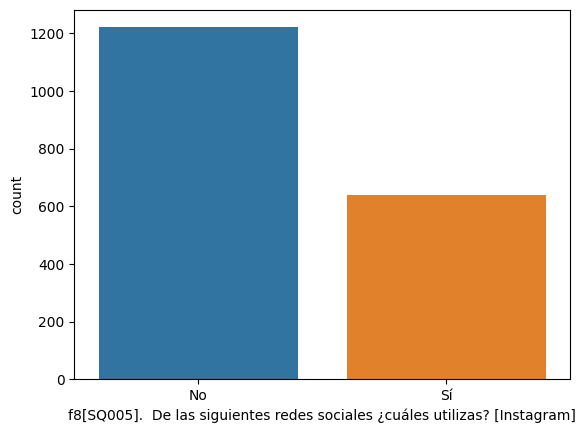

    f8[SQ005].  De las siguientes redes sociales ¿cuáles utilizas? [Instagram]
No                                               1221                         
Sí                                                639                         
 


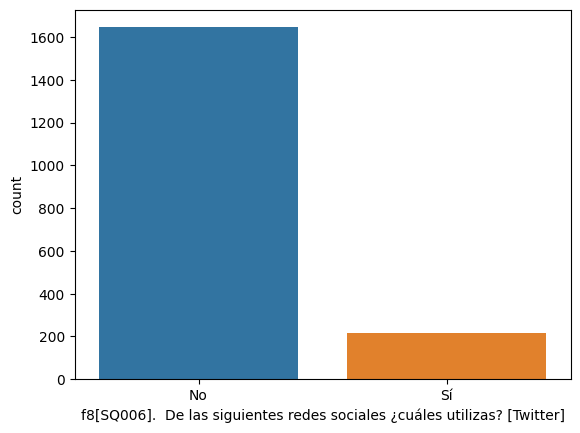

    f8[SQ006].  De las siguientes redes sociales ¿cuáles utilizas? [Twitter]
No                                               1646                       
Sí                                                214                       
 


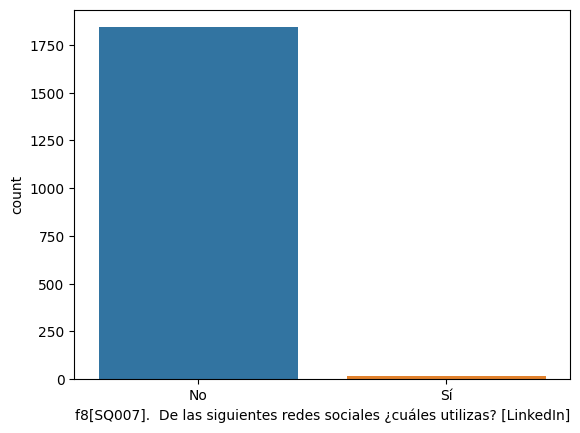

    f8[SQ007].  De las siguientes redes sociales ¿cuáles utilizas? [LinkedIn]
No                                               1843                        
Sí                                                 17                        
 


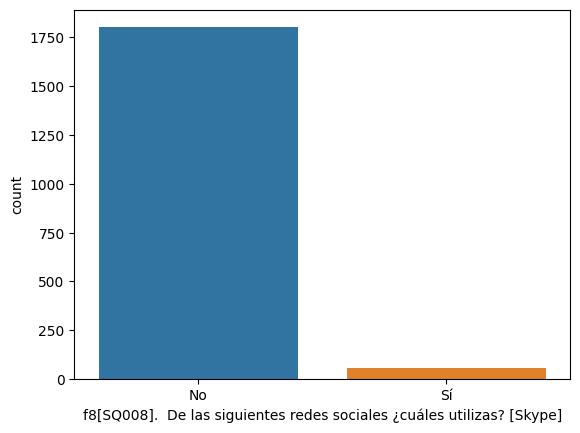

    f8[SQ008].  De las siguientes redes sociales ¿cuáles utilizas? [Skype]
No                                               1801                     
Sí                                                 59                     
 


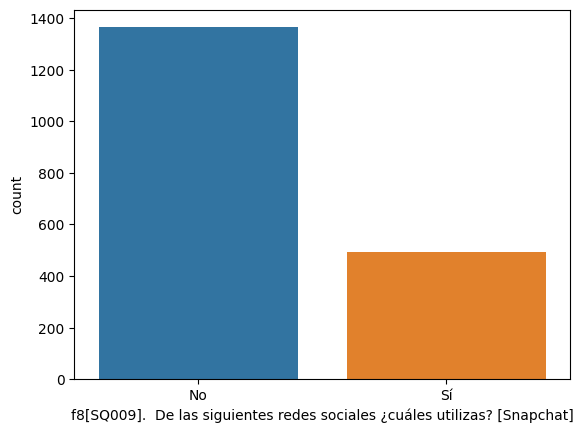

    f8[SQ009].  De las siguientes redes sociales ¿cuáles utilizas? [Snapchat]
No                                               1365                        
Sí                                                495                        
 


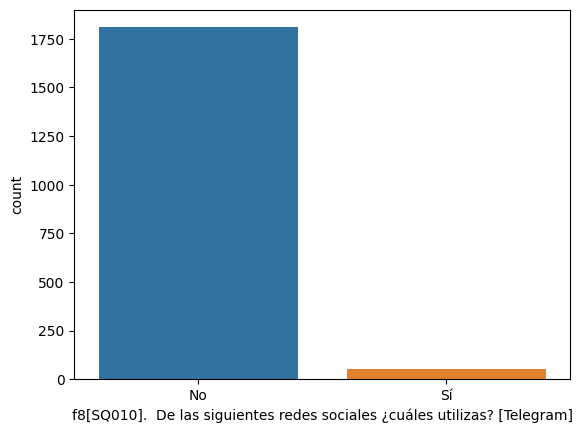

    f8[SQ010].  De las siguientes redes sociales ¿cuáles utilizas? [Telegram]
No                                               1809                        
Sí                                                 51                        
 


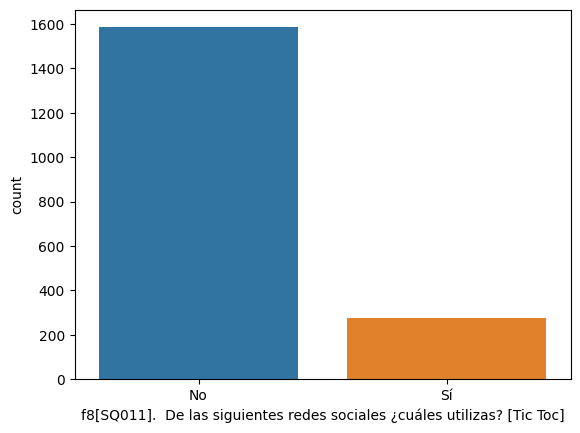

    f8[SQ011].  De las siguientes redes sociales ¿cuáles utilizas? [Tic Toc]
No                                               1585                       
Sí                                                275                       
 


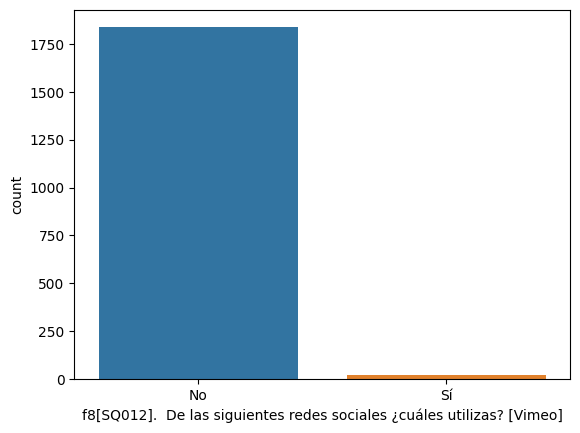

    f8[SQ012].  De las siguientes redes sociales ¿cuáles utilizas? [Vimeo]
No                                               1836                     
Sí                                                 24                     
 


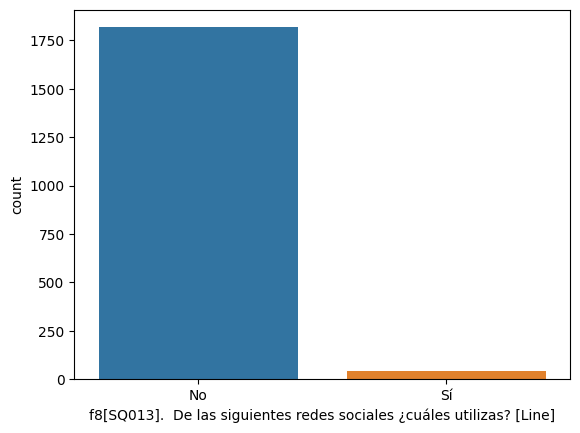

    f8[SQ013].  De las siguientes redes sociales ¿cuáles utilizas? [Line]
No                                               1818                    
Sí                                                 42                    
 
                           f8[other].  De las siguientes redes sociales ¿cuáles utilizas? [Otro]
like                                                                       6                    
Wattpad                                                                    5                    
Wattpat                                                                    2                    
Todo                                                                       2                    
Ninguno                                                                    2                    
Like                                                                       2                    
todas las anteriores                                                       2                    


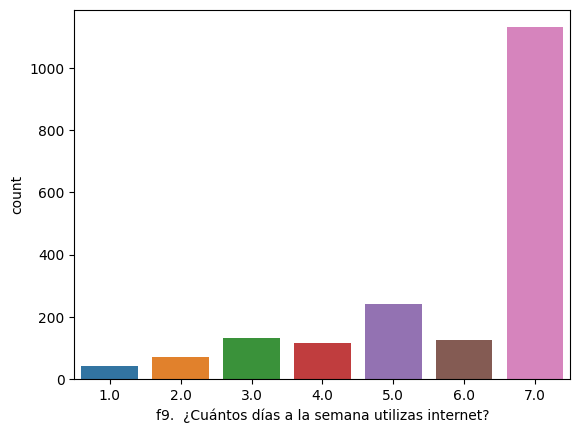

     f9.  ¿Cuántos días a la semana utilizas internet?
7.0                                               1130
5.0                                                242
3.0                                                132
6.0                                                125
4.0                                                116
2.0                                                 72
1.0                                                 43
 


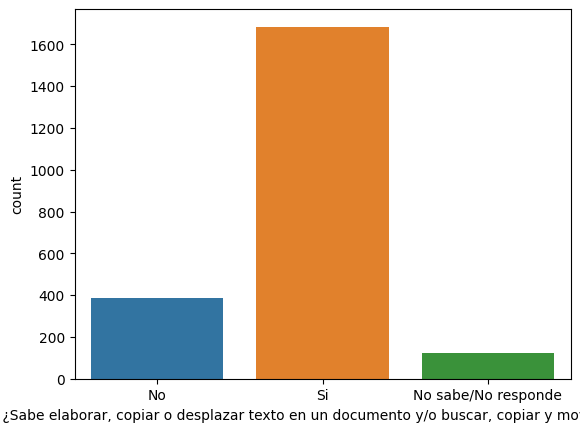

                     z1.  ¿Sabe elaborar, copiar o desplazar texto en un documento y/o buscar, copiar y mover archivos?
Si                                                                1684                                                 
No                                                                 387                                                 
No sabe/No responde                                                121                                                 
 


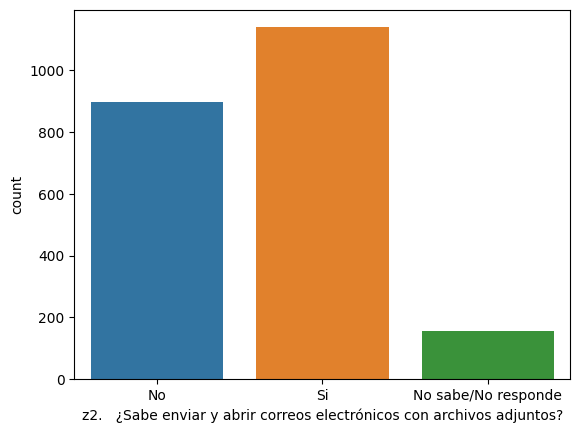

                     z2.   ¿Sabe enviar y abrir correos electrónicos con archivos adjuntos?
Si                                                                1139                     
No                                                                 898                     
No sabe/No responde                                                155                     
 


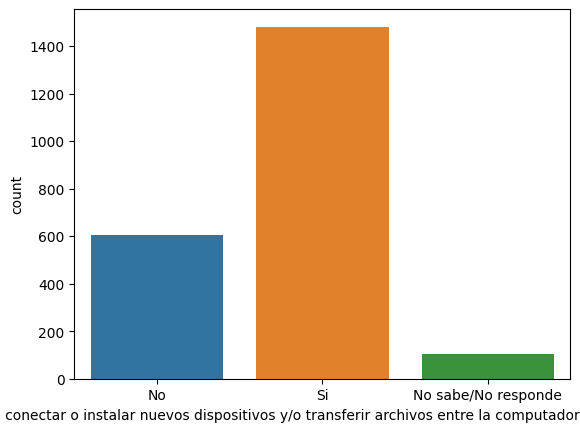

                     z3.   ¿Sabe conectar o instalar nuevos dispositivos y/o transferir archivos entre la computadora y otro dispositivo?
Si                                                                1481                                                                   
No                                                                 606                                                                   
No sabe/No responde                                                105                                                                   
 


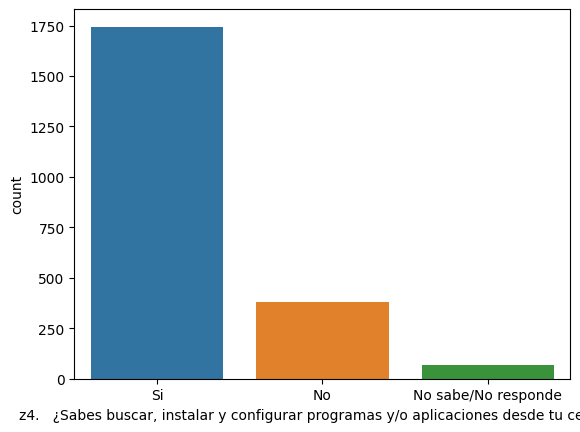

                     z4.   ¿Sabes buscar, instalar y configurar programas y/o aplicaciones desde tu celular ?
Si                                                                1744                                       
No                                                                 378                                       
No sabe/No responde                                                 70                                       
 


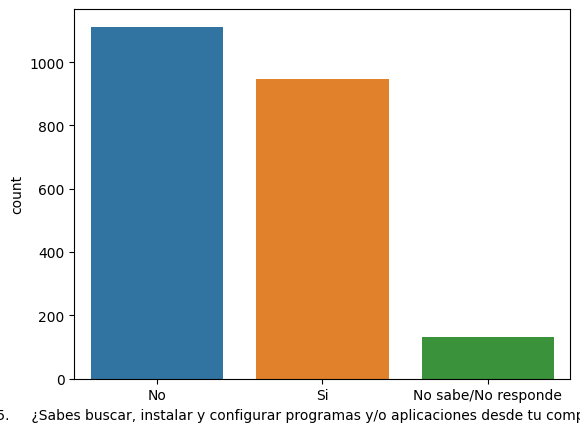

                     z5.     ¿Sabes buscar, instalar y configurar programas y/o aplicaciones desde tu computadora ? 
No                                                                1112                                              
Si                                                                 948                                              
No sabe/No responde                                                132                                              
 


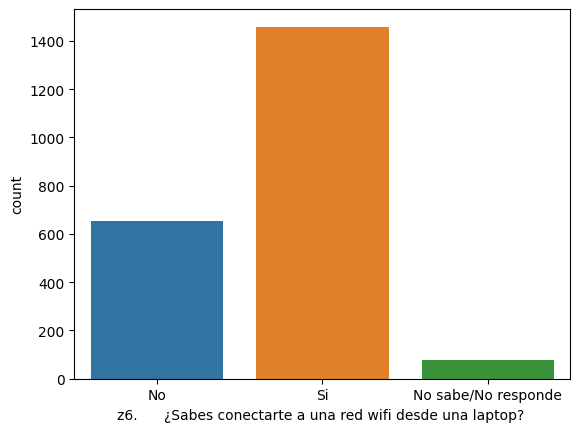

                     z6.      ¿Sabes conectarte a una red wifi desde una laptop? 
Si                                                                1459           
No                                                                 655           
No sabe/No responde                                                 78           
 


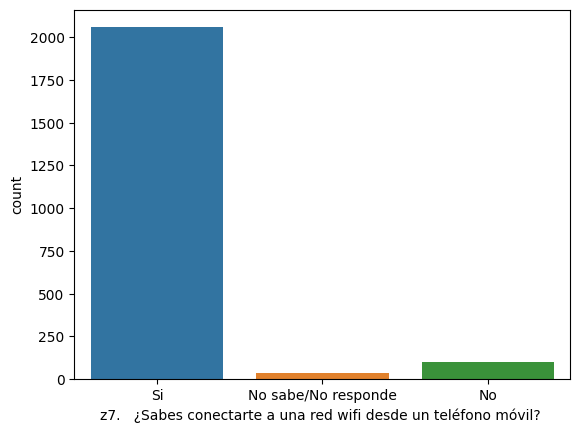

                     z7.   ¿Sabes conectarte a una red wifi desde un teléfono móvil? 
Si                                                                2058               
No                                                                  99               
No sabe/No responde                                                 35               
 


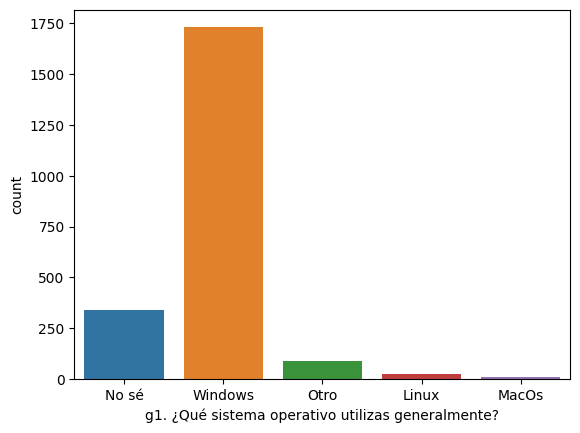

         g1. ¿Qué sistema operativo utilizas generalmente?
Windows                                               1729
No sé                                                  341
Otro                                                    88
Linux                                                   25
MacOs                                                    9
 
                                                    g1[other]. ¿Qué sistema operativo utilizas generalmente? [Otro]
Android                                                                                             7              
ninguno                                                                                             4              
android                                                                                             3              
Ninguno                                                                                             3              
hp                                                              

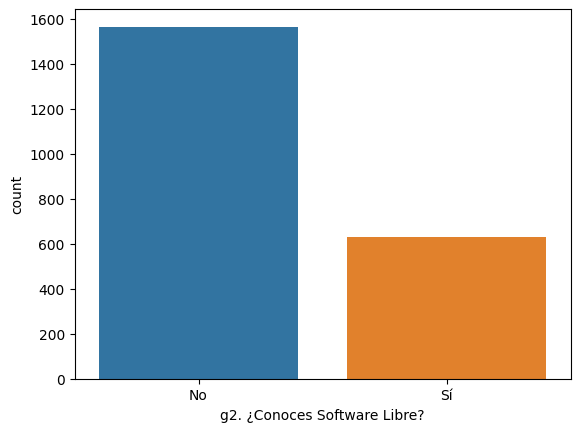

    g2. ¿Conoces Software Libre?
No                          1564
Sí                           628
 


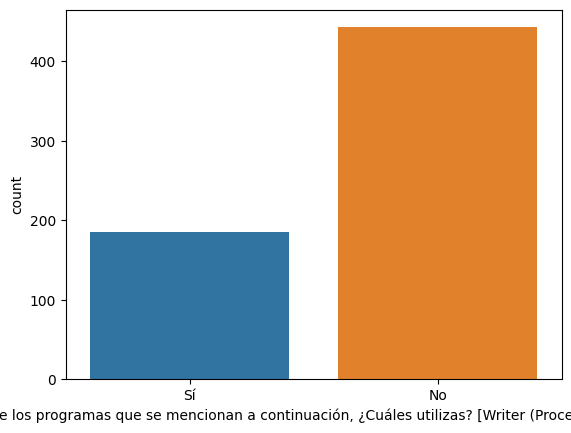

    g3[1]. De los programas que se mencionan a continuación, ¿Cuáles utilizas? [Writer (Procesador de texto)]
No                                                443                                                        
Sí                                                185                                                        
 


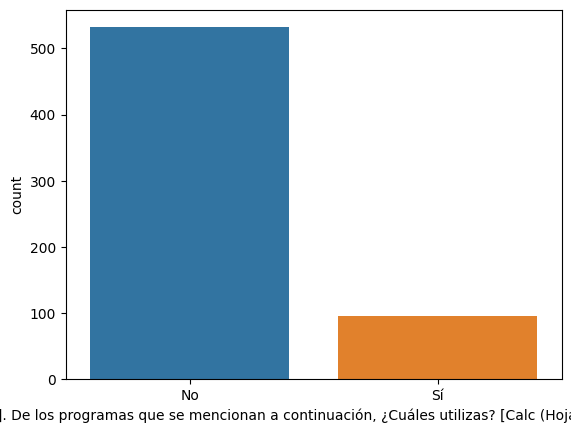

    g3[2]. De los programas que se mencionan a continuación, ¿Cuáles utilizas? [Calc (Hoja de cálculo)]
No                                                532                                                  
Sí                                                 96                                                  
 


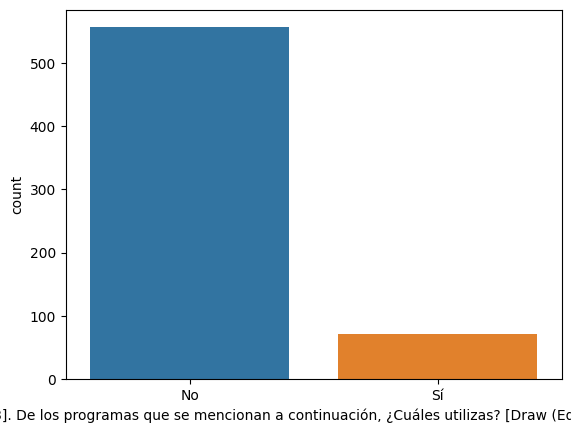

    g3[3]. De los programas que se mencionan a continuación, ¿Cuáles utilizas? [Draw (Editor gráfco)]
No                                                556                                                
Sí                                                 72                                                
 


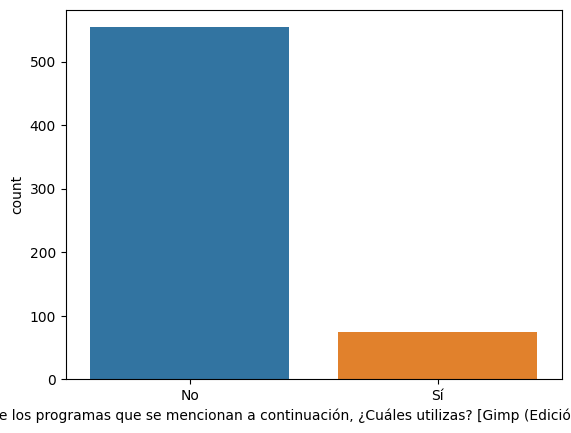

    g3[4]. De los programas que se mencionan a continuación, ¿Cuáles utilizas? [Gimp (Edición de imágenes)]
No                                                554                                                      
Sí                                                 74                                                      
 


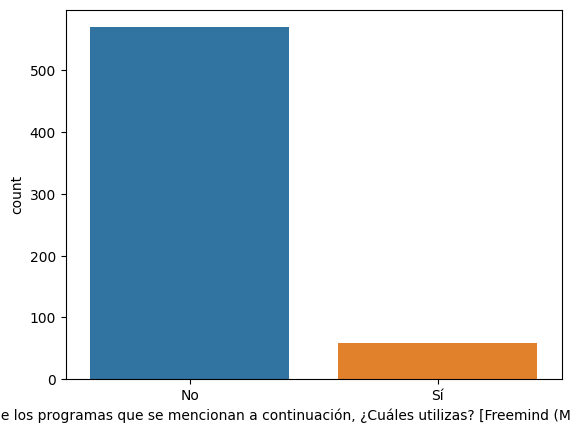

    g3[5]. De los programas que se mencionan a continuación, ¿Cuáles utilizas? [Freemind (Mapas mentales)]
No                                                570                                                     
Sí                                                 58                                                     
 


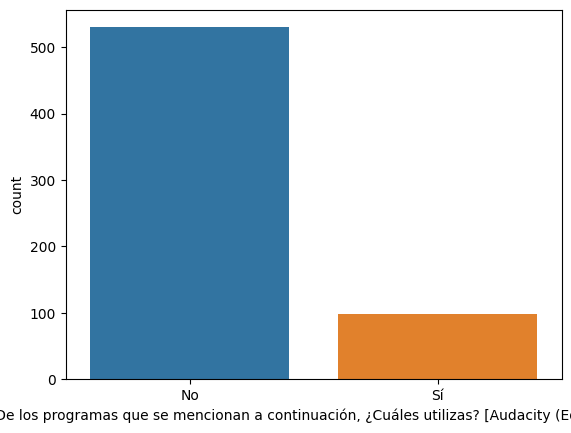

    g3[6]. De los programas que se mencionan a continuación, ¿Cuáles utilizas? [Audacity (Editor de audio)]
No                                                530                                                      
Sí                                                 98                                                      
 


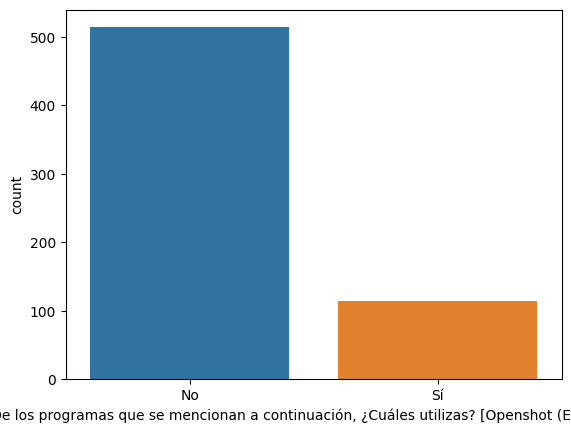

    g3[7]. De los programas que se mencionan a continuación, ¿Cuáles utilizas? [Openshot (Editor de video )]
No                                                514                                                       
Sí                                                114                                                       
 


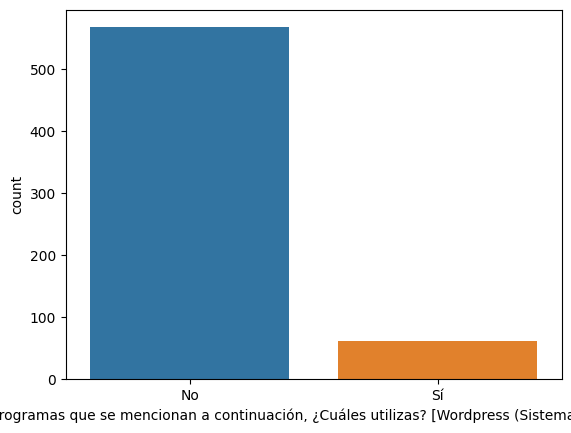

    g3[8]. De los programas que se mencionan a continuación, ¿Cuáles utilizas? [Wordpress (Sistema para crear siios web)]
No                                                567                                                                    
Sí                                                 61                                                                    
 


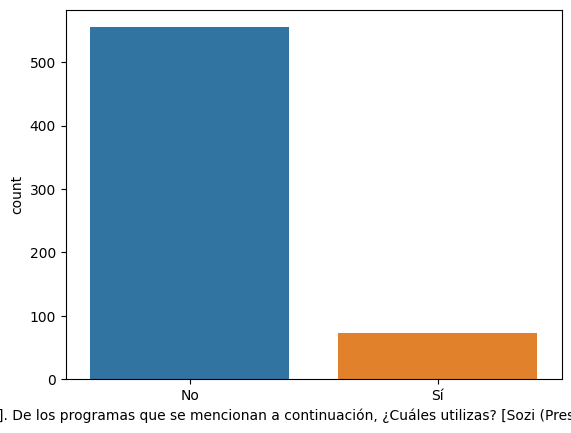

    g3[9]. De los programas que se mencionan a continuación, ¿Cuáles utilizas? [Sozi (Presentaciones)]
No                                                555                                                 
Sí                                                 73                                                 
 


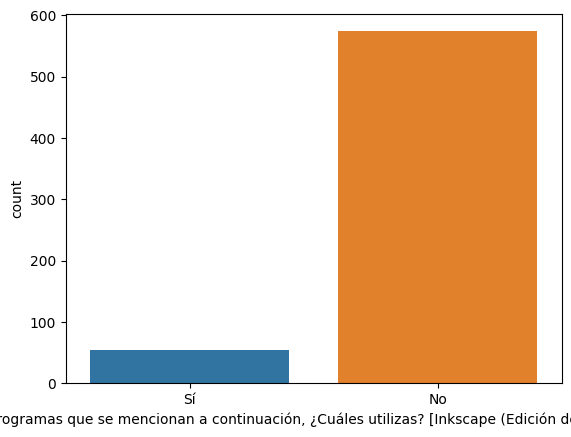

    g3[10]. De los programas que se mencionan a continuación, ¿Cuáles utilizas? [Inkscape (Edición de imágenes vectoriales)]
No                                                574                                                                       
Sí                                                 54                                                                       
 


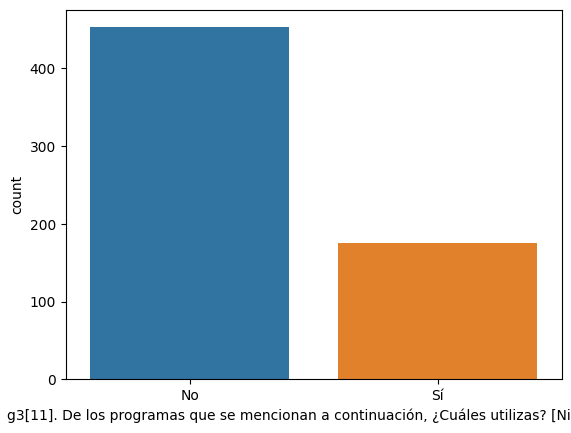

    g3[11]. De los programas que se mencionan a continuación, ¿Cuáles utilizas? [Ninguno]
No                                                453                                    
Sí                                                175                                    
 


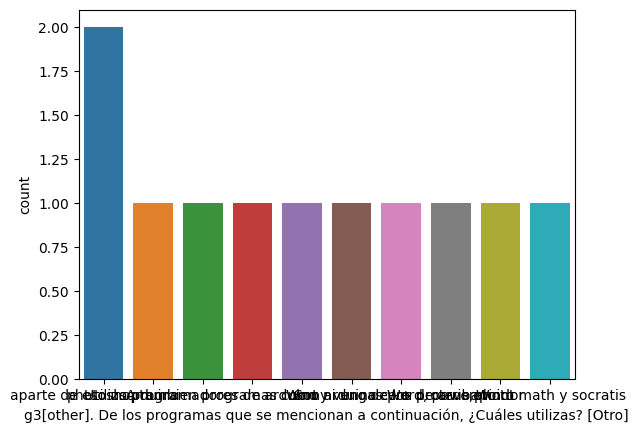

                                                    g3[other]. De los programas que se mencionan a continuación, ¿Cuáles utilizas? [Otro]
photoshop                                                                                           2                                    
Arduino                                                                                             1                                    
Utilizo programadores de arduino                                                                    1                                    
aparte de eso uso tambien programas como arduin...                                                  1                                    
Wort                                                                                                1                                    
Sony vengas pro                                                                                     1                                    
ni uno de los de arriba           

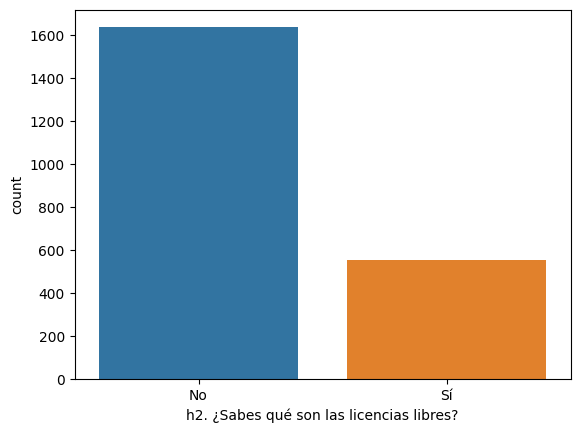

    h2. ¿Sabes qué son las licencias libres?
No                                      1636
Sí                                       556
 


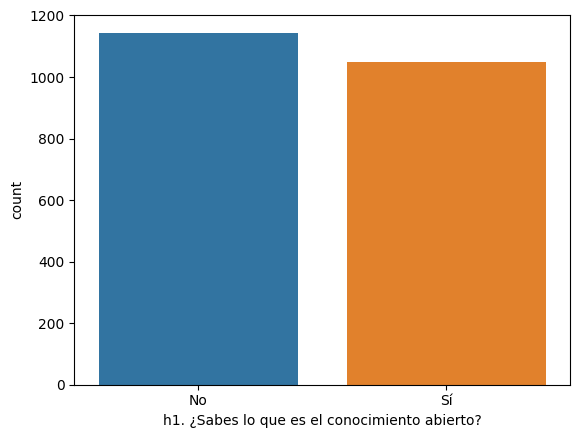

    h1. ¿Sabes lo que es el conocimiento abierto?
No                                           1144
Sí                                           1048
 


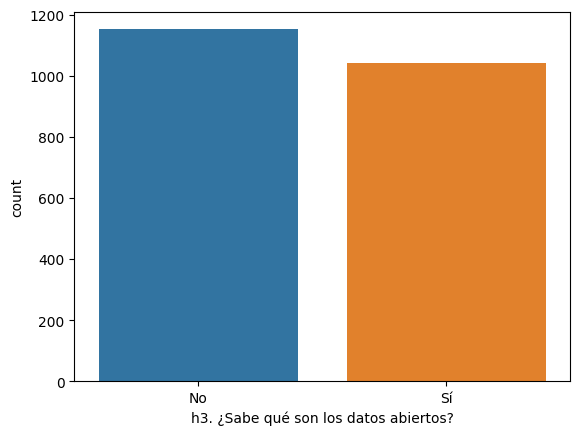

    h3. ¿Sabe qué son los datos abiertos?
No                                   1152
Sí                                   1040
 


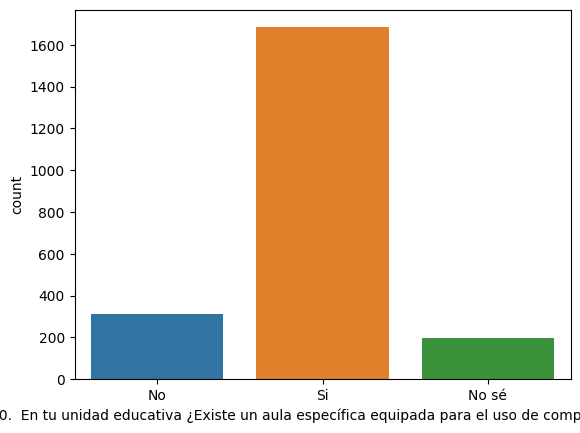

       i0.  En tu unidad educativa ¿Existe un aula específica equipada para el uso de computadoras?
Si                                                  1684                                           
No                                                   311                                           
No sé                                                197                                           
 


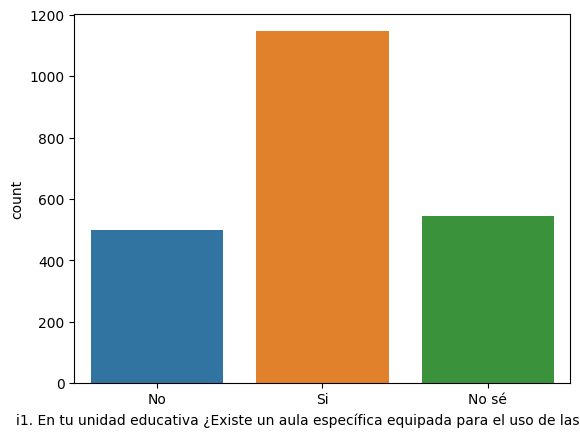

       i1. En tu unidad educativa ¿Existe un aula específica equipada para el uso de las KUAA?
Si                                                  1147                                      
No sé                                                546                                      
No                                                   499                                      
 


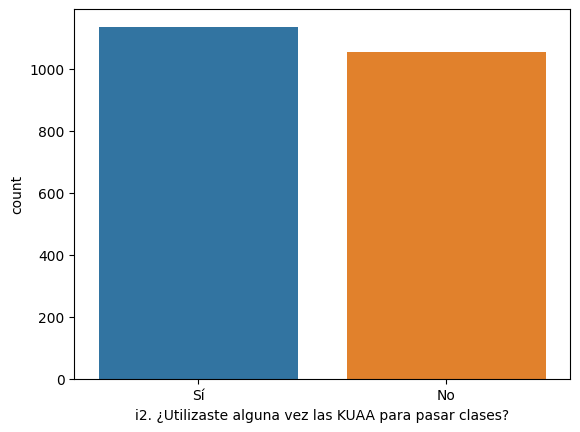

    i2. ¿Utilizaste alguna vez las KUAA para pasar clases?
Sí                                               1136     
No                                               1056     
 


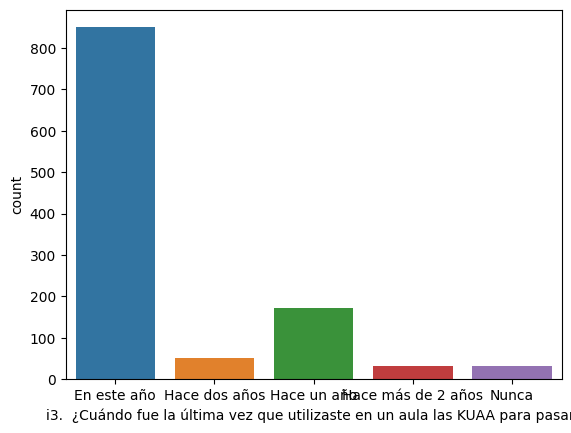

                    i3.  ¿Cuándo fue la última vez que utilizaste en un aula las KUAA para pasar?
En este año                                                       850                            
Hace un año                                                       171                            
Hace dos años                                                      52                            
Nunca                                                              32                            
Hace más de 2 años                                                 31                            
 


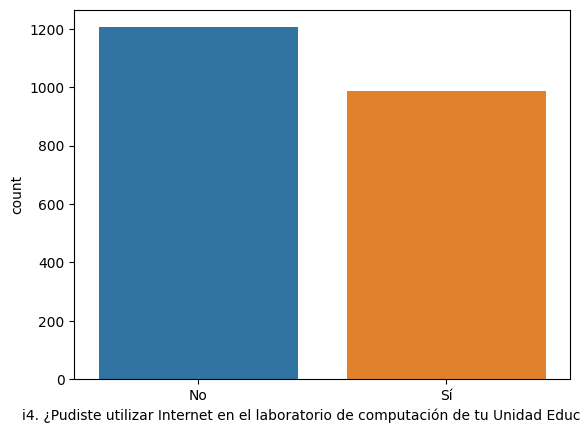

    i4. ¿Pudiste utilizar Internet en el laboratorio de computación de tu Unidad Educativa?
No                                               1205                                      
Sí                                                987                                      
 


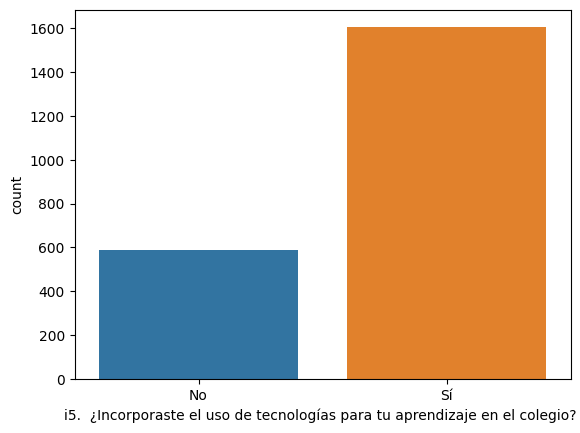

    i5.  ¿Incorporaste el uso de tecnologías para tu aprendizaje en el colegio? 
Sí                                               1603                           
No                                                589                           
 


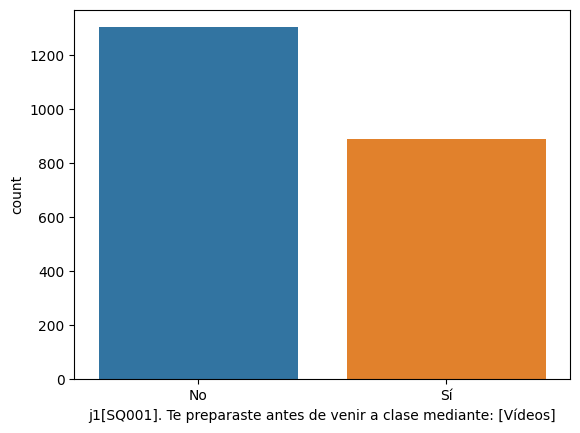

    j1[SQ001]. Te preparaste antes de venir a clase mediante: [Vídeos]
No                                               1302                 
Sí                                                890                 
 


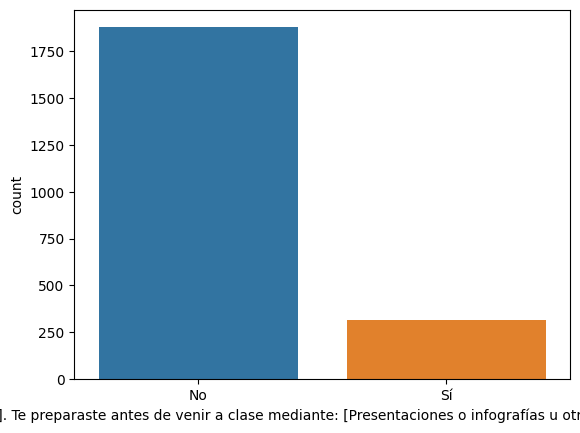

    j1[SQ002]. Te preparaste antes de venir a clase mediante: [Presentaciones o infografías u otro material gráfico]
No                                               1877                                                               
Sí                                                315                                                               
 


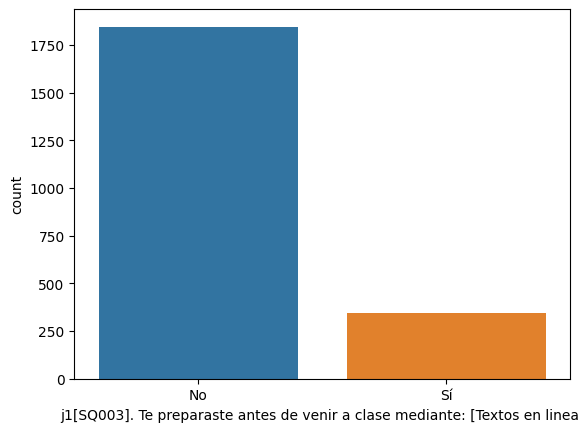

    j1[SQ003]. Te preparaste antes de venir a clase mediante: [Textos en linea]
No                                               1845                          
Sí                                                347                          
 


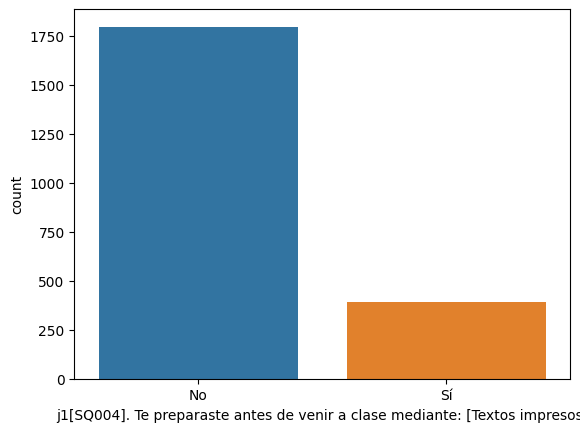

    j1[SQ004]. Te preparaste antes de venir a clase mediante: [Textos impresos]
No                                               1798                          
Sí                                                394                          
 


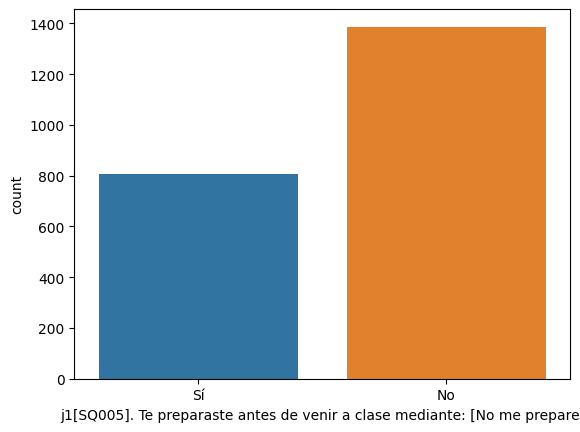

    j1[SQ005]. Te preparaste antes de venir a clase mediante: [No me prepare]
No                                               1387                        
Sí                                                805                        
 
                                                    j1[other]. Te preparaste antes de venir a clase mediante: [Otro]
Libros                                                                                              5               
libros                                                                                              3               
1                                                                                                   2               
No                                                                                                  1               
Nose                                                                                                1               
Conocimientos previos que me da mi tio                        

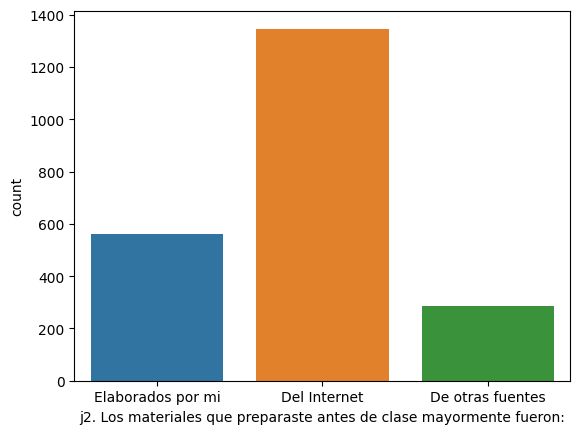

                   j2. Los materiales que preparaste antes de clase mayormente fueron:
Del Internet                                                    1346                  
Elaborados por mi                                                562                  
De otras fuentes                                                 284                  
 


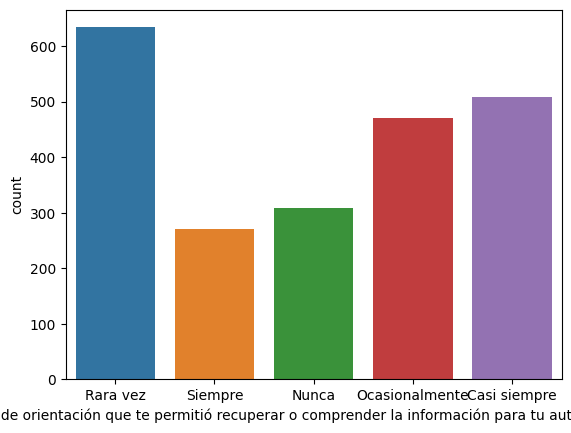

                j3. Recibiste una guía de estudio o de orientación que te permitió recuperar o comprender la información para tu auto preparación mediante recursos digitales.
Rara vez                                                      634                                                                                                             
Casi siempre                                                  509                                                                                                             
Ocasionalmente                                                470                                                                                                             
Nunca                                                         308                                                                                                             
Siempre                                                       271                                                            

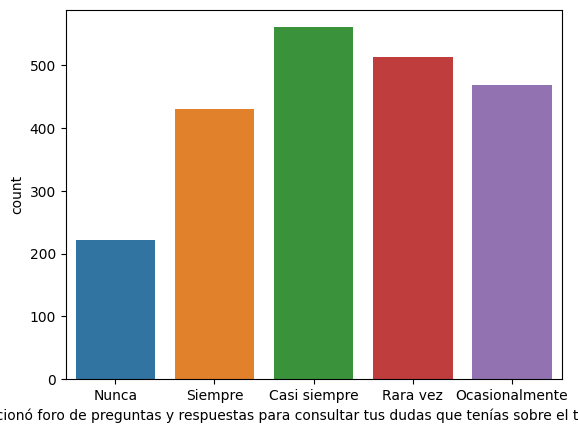

                j4. El profesor te proporcionó foro de preguntas y respuestas para consultar tus dudas que tenías sobre el trabajo asignado fuera del aula.
Casi siempre                                                  560                                                                                          
Rara vez                                                      513                                                                                          
Ocasionalmente                                                468                                                                                          
Siempre                                                       430                                                                                          
Nunca                                                         221                                                                                          
 


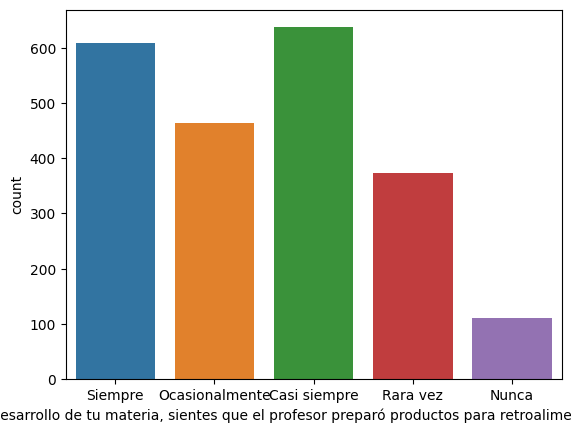

                j5. Para el desarrollo de tu materia, sientes que el profesor preparó productos para retroalimentar tu aprendizaje.
Casi siempre                                                  637                                                                  
Siempre                                                       608                                                                  
Ocasionalmente                                                463                                                                  
Rara vez                                                      374                                                                  
Nunca                                                         110                                                                  
 


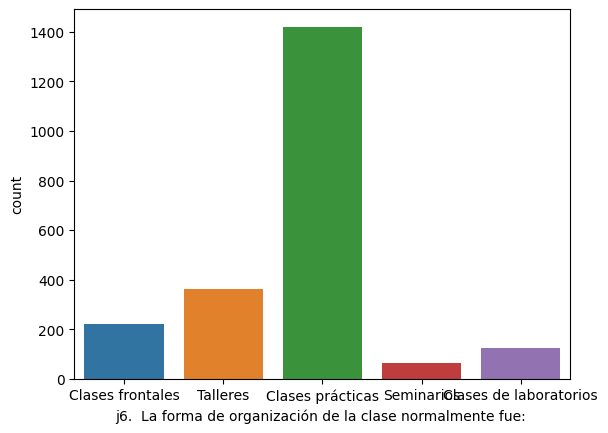

                        j6.  La forma de organización de la clase normalmente fue: 
Clases prácticas                                                     1421          
Talleres                                                              364          
Clases frontales                                                      220          
Clases de laboratorios                                                123          
Seminarios                                                             64          
 


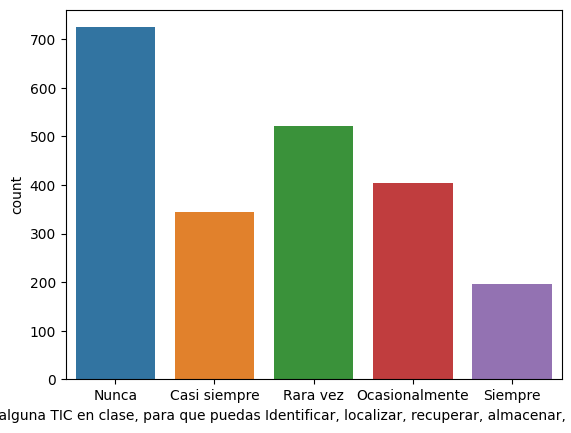

                j7. Tu profesor Integró las KUAA o alguna TIC en clase, para que puedas Identificar, localizar, recuperar, almacenar, organizar y analizar la información digital.
Nunca                                                         725                                                                                                                 
Rara vez                                                      521                                                                                                                 
Ocasionalmente                                                405                                                                                                                 
Casi siempre                                                  344                                                                                                                 
Siempre                                                       197                                        

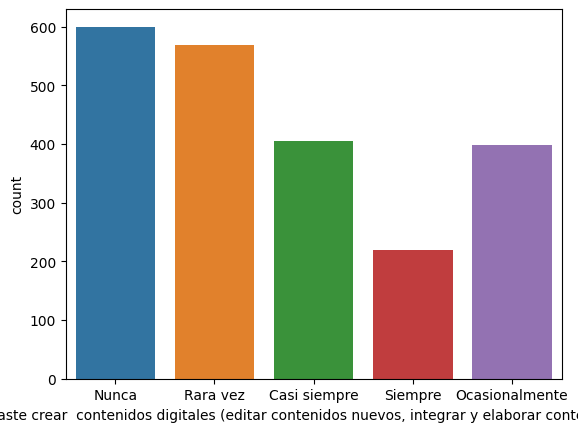

                j8. Lograste crear  contenidos digitales (editar contenidos nuevos, integrar y elaborar contenidos previos)
Nunca                                                         600                                                          
Rara vez                                                      568                                                          
Casi siempre                                                  406                                                          
Ocasionalmente                                                399                                                          
Siempre                                                       219                                                          
 


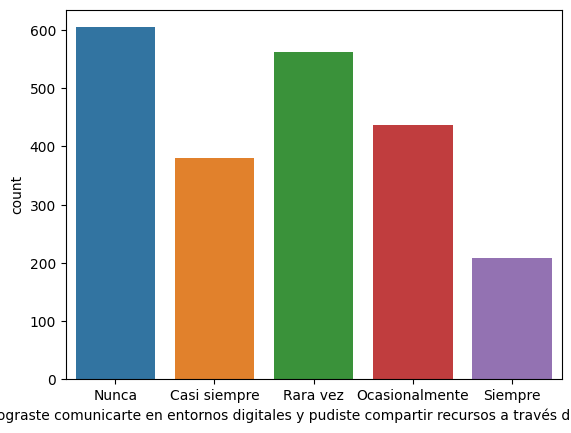

                j9.  En tu clase, lograste comunicarte en entornos digitales y pudiste compartir recursos a través de herramientas en línea. 
Nunca                                                         605                                                                            
Rara vez                                                      562                                                                            
Ocasionalmente                                                437                                                                            
Casi siempre                                                  380                                                                            
Siempre                                                       208                                                                            
 


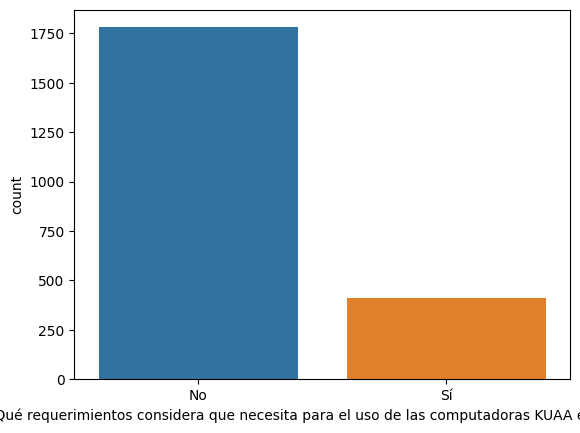

    k1[SQ001].  ¿Qué requerimientos considera que necesita para el uso de las computadoras KUAA en su clase? [Mobiliario]
No                                               1781                                                                    
Sí                                                411                                                                    
 


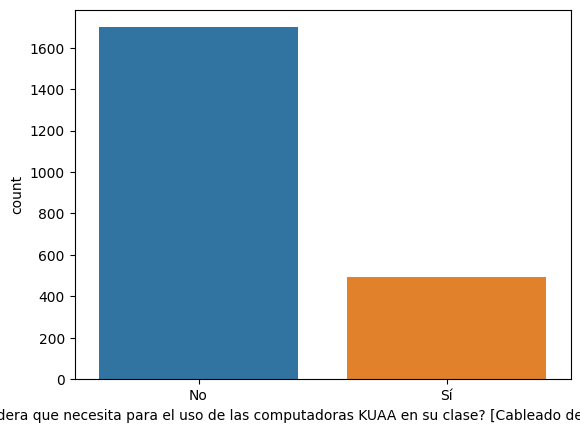

    k1[SQ002].  ¿Qué requerimientos considera que necesita para el uso de las computadoras KUAA en su clase? [Cableado de Red para la interconexión de las computadoras]
No                                               1699                                                                                                                   
Sí                                                493                                                                                                                   
 


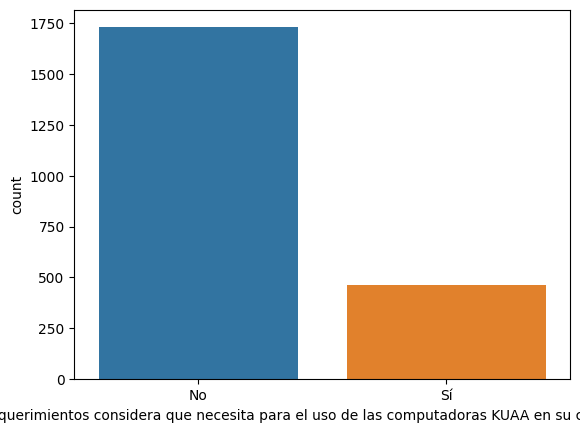

    k1[SQ003].  ¿Qué requerimientos considera que necesita para el uso de las computadoras KUAA en su clase? [Medidas de seguridad]
No                                               1730                                                                              
Sí                                                462                                                                              
 


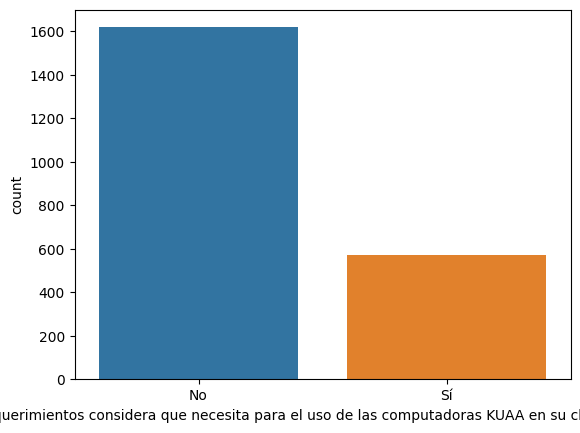

    k1[SQ004].  ¿Qué requerimientos considera que necesita para el uso de las computadoras KUAA en su clase? [Equipo de computación]
No                                               1619                                                                               
Sí                                                573                                                                               
 


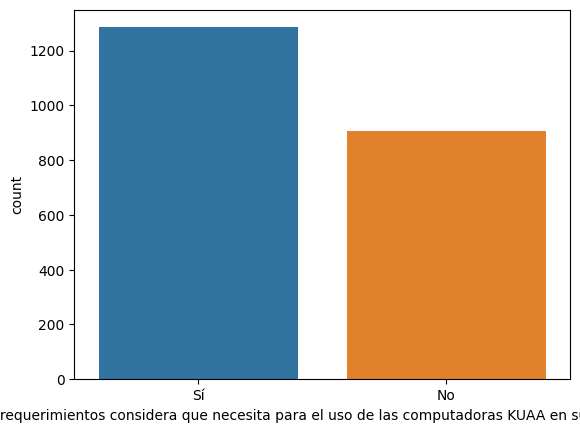

    k1[SQ005].  ¿Qué requerimientos considera que necesita para el uso de las computadoras KUAA en su clase? [Acceso a Internet]
Sí                                               1285                                                                           
No                                                907                                                                           
 
                                                    k1[other].  ¿Qué requerimientos considera que necesita para el uso de las computadoras KUAA en su clase? [Otro]
nose                                                                                                4                                                              
Nose                                                                                                3                                                              
1                                                                                                   2                  

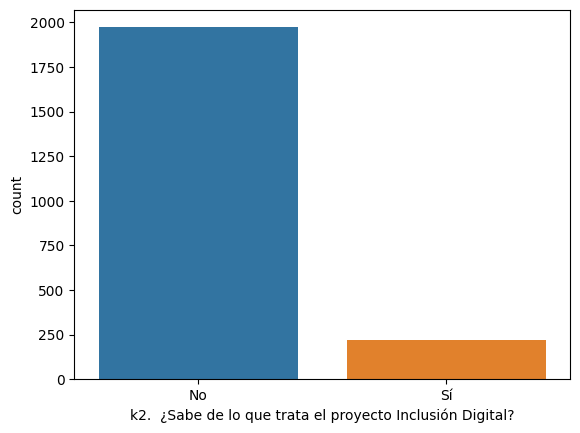

    k2.  ¿Sabe de lo que trata el proyecto Inclusión Digital?
No                                               1973        
Sí                                                219        
 
                                                    k3.  Describa brevemente acerca del "Proyecto Inclusión Digital"
Es buena                                                                                            2               
Hace que las alimnas se integren, mas facil a l...                                                  1               
Es incentivar, enseñar y poner en práctica a to...                                                  1               
 Es el acceso a las tecnogias de informacion  t...                                                  1               
el poder usar las computadoras y algunos programas                                                  1               
...                                                                                               ...         

In [ ]:
for colet in df.columns:
  try:
    counter = df[colet].value_counts().to_frame()
    if len(counter) <= 15:
      sns.countplot(x=df[colet], data=df)
      plt.show()
    else:
        pass
    
  except:
    pass
  
  print(counter)
  print(" ")

# Valores perdidos

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)
plt.show()

In [ ]:
plt.figure(figsize=(40,40))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)
plt.show()

# Correlaciones

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax); # sns.heatmap(df.corr(annot=True))  view a color-encoded grid of all pair-wise correlations

In [ ]:
import missingno
missingno.matrix(df)

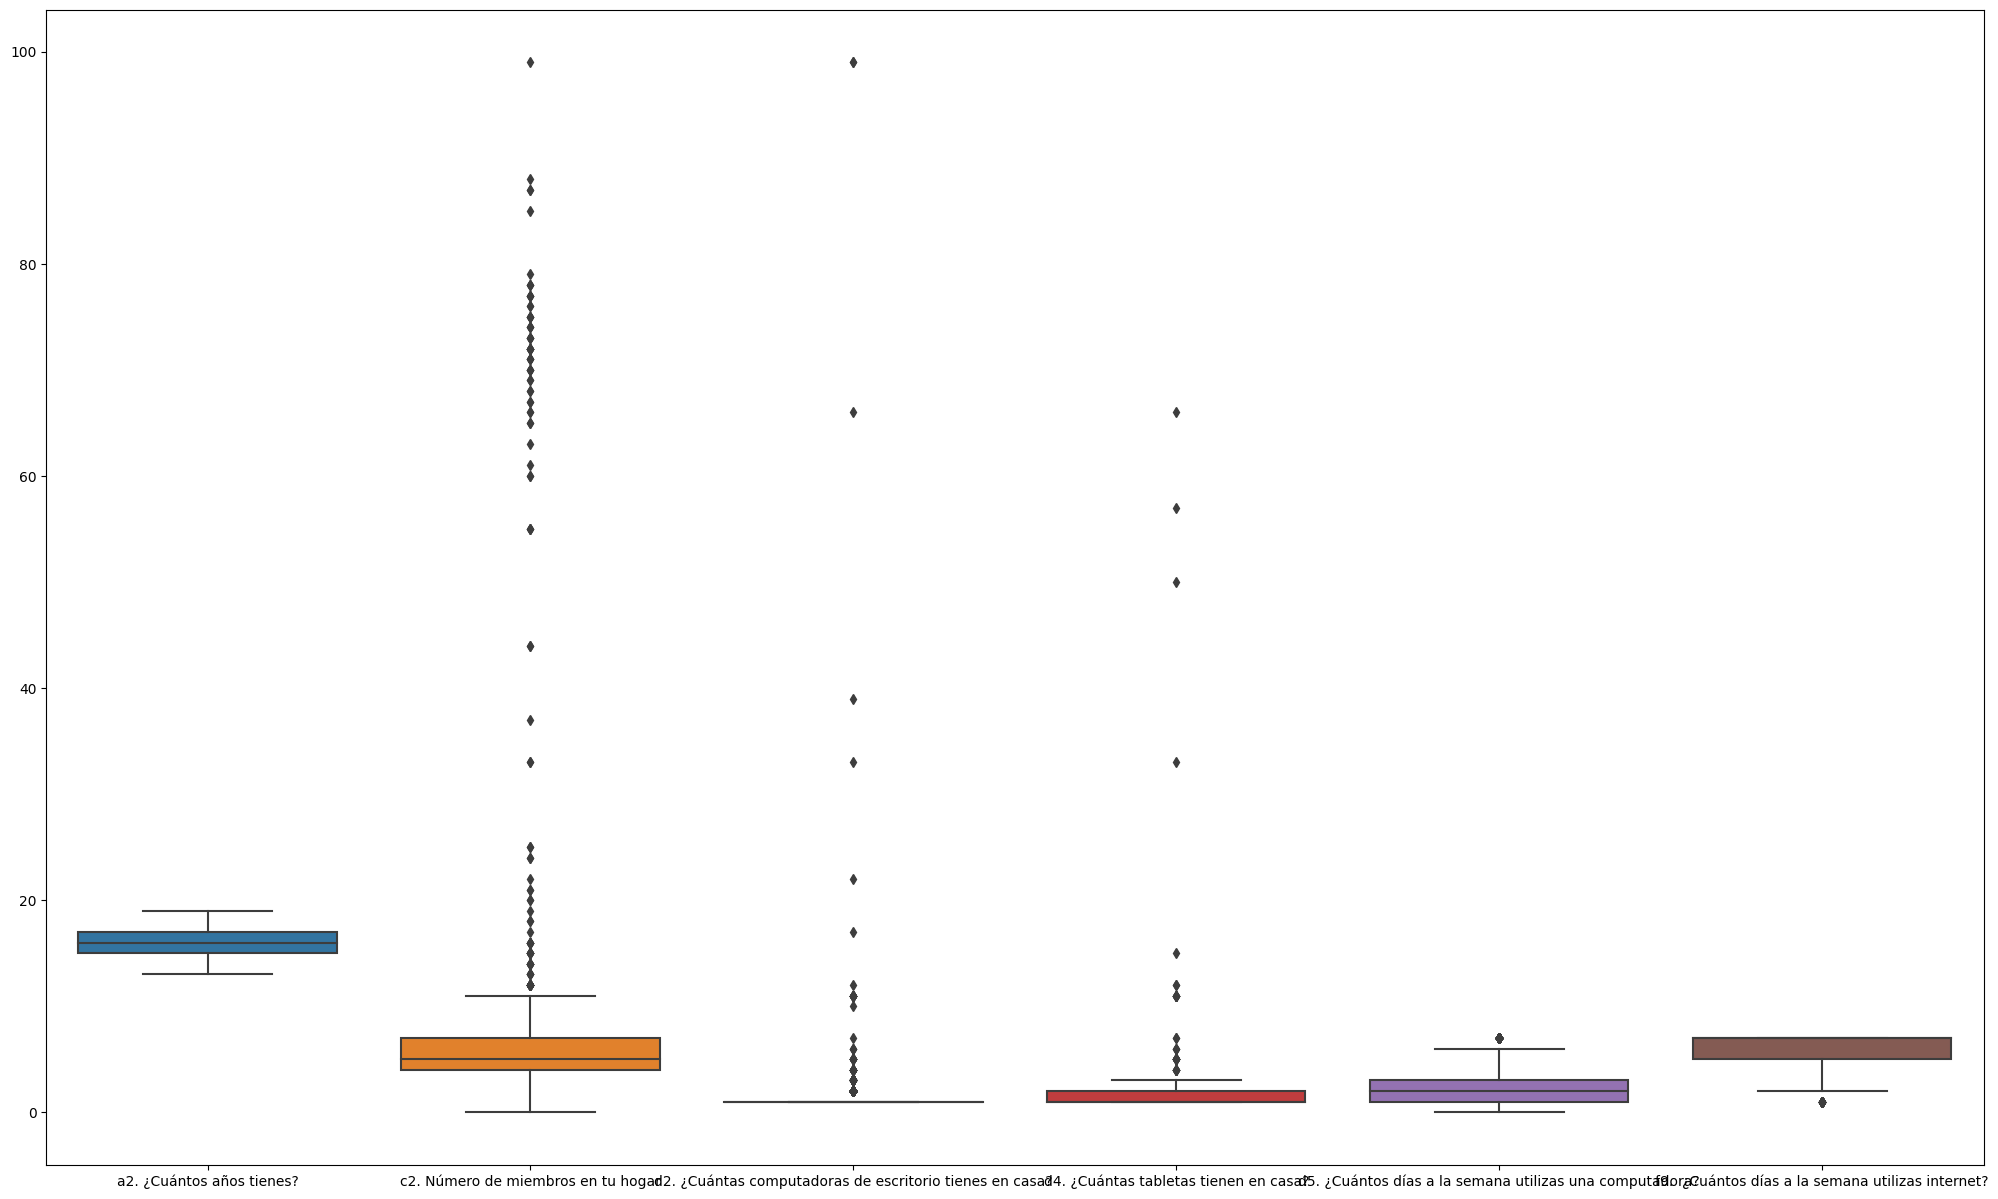

In [ ]:
plt.figure(figsize=(25,15))
sns.boxplot(data=df)
plt.show()

In [ ]:
dfl = df['k3.  Describa brevemente acerca del "Proyecto Inclusión Digital"']
dfl = dfl.dropna( axis= 0)

In [ ]:
dfl

In [ ]:
texto = ''
for i in dfl:
  texto = str(texto) +str(i)
  print(i)

In [ ]:
texto

In [ ]:
#!conda install -c conda-forge wordcloud==1.4.1 --yes
#!conda install -c conda-forge wordcloud
!pip3 install wordcloud --upgrade

# importar el paquete y su conjunto de palabras 
from wordcloud import WordCloud, STOPWORDS

In [ ]:
stopwords = set(STOPWORDS) #utilidad para eliminar palabras redundantes o fallas

In [ ]:
# instanciar un objeto de tipo nube
nube = WordCloud(
    background_color='white', #fondo blanco
    max_words=2000, # las primeras 2000 palabras
    stopwords=stopwords,  # por si necesiramos eliminar alguna palabra luego, mas adelante
    collocations=False # corrige el error de que una palabra se repite en la imagen
)

# generar la nube de palabras 
nube.generate(texto)

# cambiar tamaño de imagen
fig = plt.figure()
fig.set_figwidth(14) # establecer ancho
fig.set_figheight(20) # establecer altura

# mostrar la nube de palabras
plt.imshow(nube, interpolation='bilinear')
plt.axis('on')
plt.show()

In [ ]:
stopwords.add('las') # añadir las palabras "said" a las palabras vacías 
stopwords.add('e')
stopwords.add('el')
stopwords.add('en')
stopwords.add('lo')
stopwords.add('los')
stopwords.add('es')
stopwords.add('un')
stopwords.add('mas')
stopwords.add('sobre')
stopwords.add('nos')
stopwords.add('del')


# instanciar un objeto de tipo nube
nube = WordCloud(
    background_color='white', #fondo blanco
    max_words=2000, # las primeras 2000 palabras
    stopwords=stopwords,  # por si necesiramos eliminar alguna palabra luego, mas adelante
    collocations=False, # corrige el error de que una palabra se repite en la imagen
    width=1600, height=800
)

# generar la nube de palabras 
nube.generate(texto)

# cambiar tamaño de imagen
fig = plt.figure(figsize=(20,10) ) # elimina bordes

#fig.set_figwidth(16) # establecer ancho
#fig.set_figheight(9) # establecer altura

# mostrar la nube de palabras
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()